<a href="https://colab.research.google.com/github/babaroscopy/Thesis/blob/main/basecnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.mkdir('/content/normal+bags')
os.mkdir('/content/Normal+Coats')
os.mkdir('/content/NormalToCoats')
os.mkdir('/content/NormalToNormal')
os.mkdir('/content/SpeedExperiments')
os.mkdir('/content/SpeedExperiments/Normal+Fast')
os.mkdir('/content/SpeedExperiments/Normal+Slow')
os.mkdir('/content/SpeedExperiments/NormalToNormal')

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from imageio import imread
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,LeakyReLU,BatchNormalization
from keras.applications import densenet
from keras.regularizers import l1
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.layers import ZeroPadding2D
from keras import optimizers
from matplotlib import pyplot
import sys
import pandas as pd
import numpy

[  0   2   1   1   3   2   3   1   2   0   3   2   0   1   0   4   6   5
   6   5   4   5   3   7   4   7   5   7   6   4   6   7  11  11  10  11
   9  10   8   9   9  10   9   9  11   8  10   8   8  15  15  14  12  14
  13  15  12  13  16  12  15  12  14  14  13  13  17  18  20  16  19  20
  19  17  18  18  19  17  18  19  16  16  17  20  24  23  22  21  23  22
  21  23  22  21  24  21  20  22  24  24  23  25  26  26  26  29  25  27
  28  28  27  28  27  25  27  28  25  26  30  32  31  32  32  30  31  31
  31  29  29  30  32  30  29  37  36  35  33  34  35  34  35  34  37  33
  36  34  35  33  33  36  36  41  41  38  39  39  40  37  37  38  39  40
  41  39  40  38  38  40  44  43  42  43  44  43  45  42  42  44  44  42
  43  41  49  49  45  48  47  45  48  47  48  46  45  46  47  46  46  48
  47  51  50  50  50  50  52  49  52  51  51  53  52  49  52  51  55  57
  54  56  53  56  53  55  53  54  54  56  54  55  57  55  56  59  60  57
  58  60  58  61  59  59  58  60  59  60  58  57  6

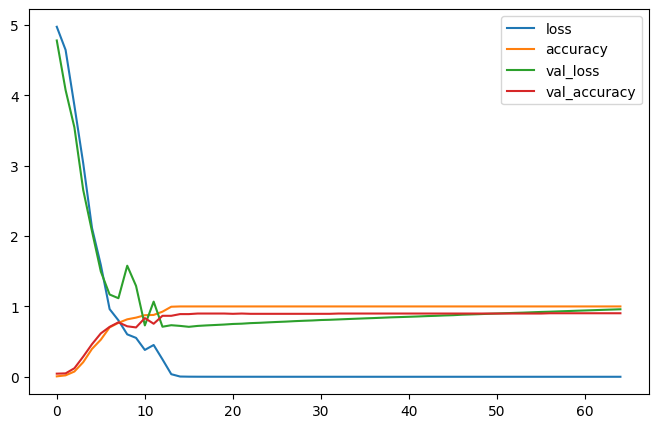

8/8 [==============================] - 0s 42ms/step
Accuracy: 90.32258064516128
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

<Figure size 640x480 with 0 Axes>

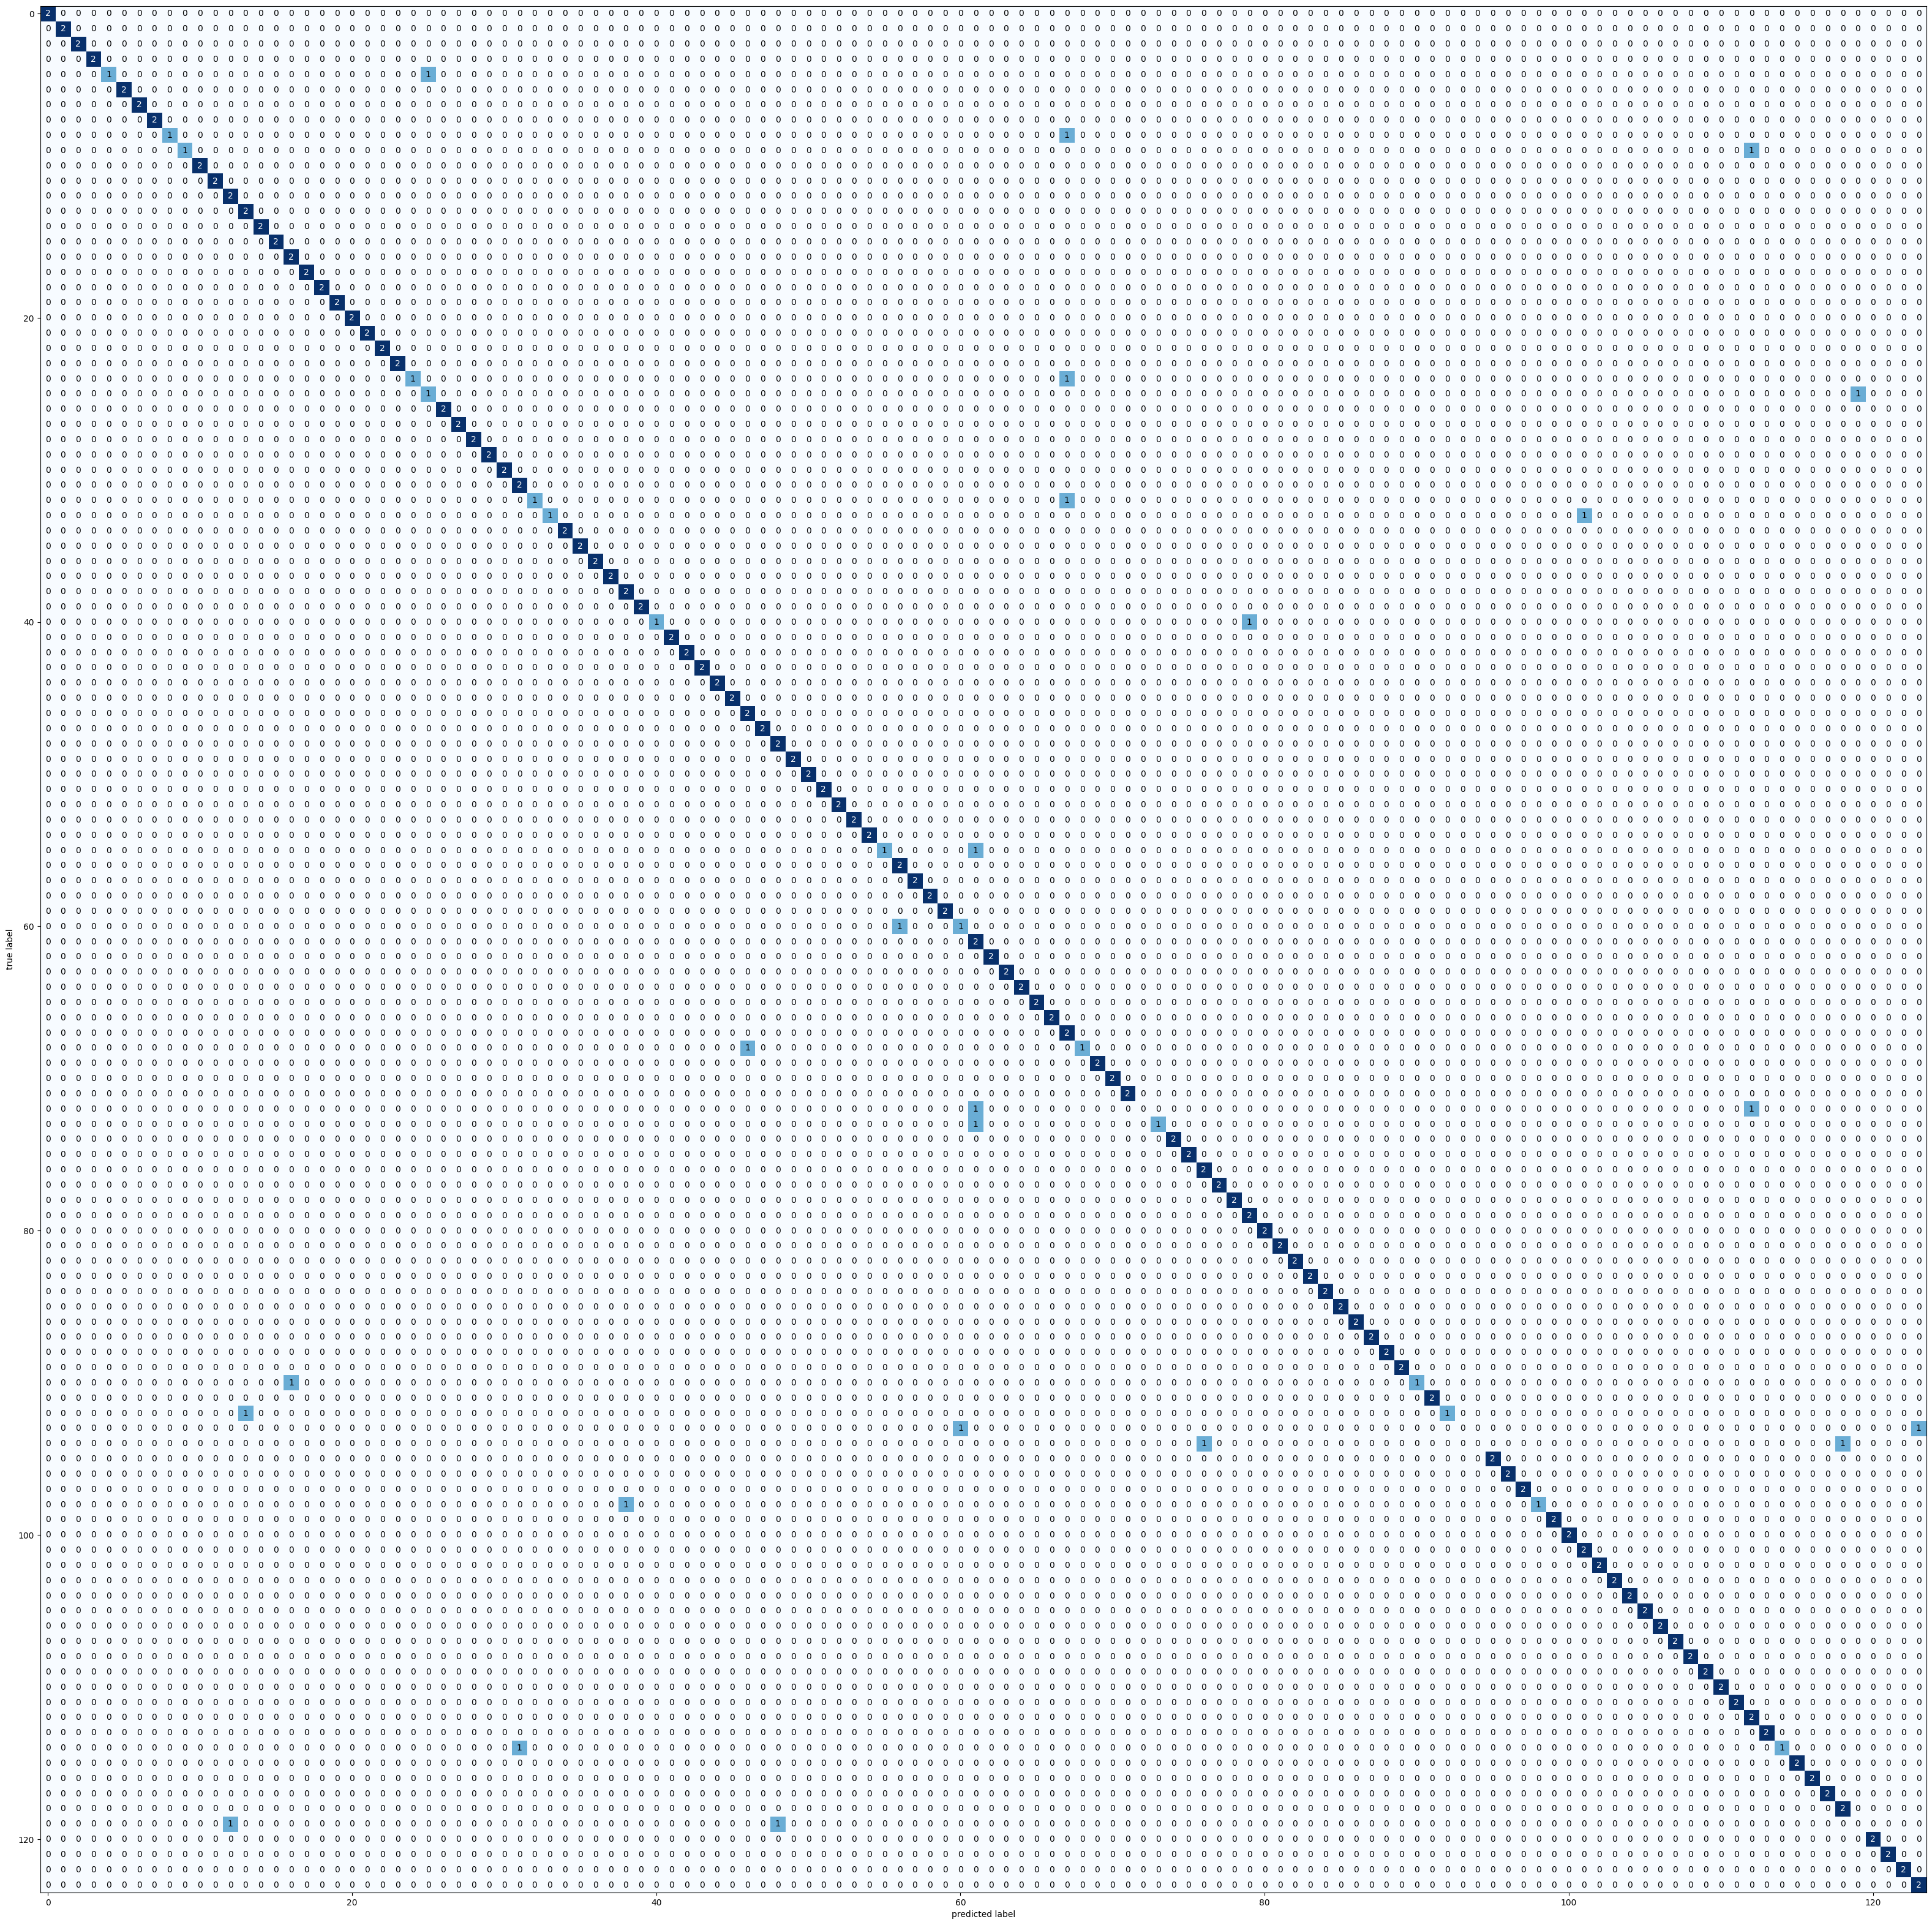

In [4]:
numpy.set_printoptions(threshold=sys.maxsize)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

images1 = "/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/TrainNormal"
files1= os.listdir(images1)
#print(files1)
X_train = [imread('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/TrainNormal/'+f) for f in files1]   # Getting Training Images
for f in files1:
    Y_train.append(f[7:10])
for i in range(0, len(Y_train)):
    Y_train[i] = int(Y_train[i])
#print(Y_train)
images2 = '/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/TestNormal'
files2= os.listdir(images2)
#print(files2)
X_test = [imread("/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/TestNormal/"+f) for f in files2]
for f in files2:
    Y_test.append(f[7:10])

for i in range(0, len(Y_test)):
    Y_test[i] = int(Y_test[i])
#print(Y_test)

X_train=np.array(X_train)
X_test=np.array(X_test)

img_rows=240
img_cols=240
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test=label_encoder.fit_transform(Y_test)
Y_train= label_encoder.fit_transform(Y_train)

print(Y_train)
print(Y_test)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = 124
epochs = 65
MODEL_NAME = 'TrainedModelFile-{}-{}.model'.format("0.0001", 'TenLayers')
model = Sequential()
model.add(Conv2D(16,3, 3,input_shape=(240, 240, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(124, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(ZeroPadding2D(padding=((0,1),(0,1))))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
batch_size = 4

model.add(Dense(124, activation='softmax'))


print(model.summary())
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

import time
start_time=time.time()
history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs,validation_data=(X_test, Y_test))
#history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs)
print('Training took {} seconds'.format(time.time()-start_time))
#model.save(MODEL_NAME)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/Curves.png')

from sklearn.metrics import accuracy_score

test_predictions = model.predict(X_test)


accuracy = accuracy_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1))*100
print("Accuracy: " + str(accuracy))
from sklearn.metrics import precision_score, recall_score
precision_score= precision_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1), average=None)

recall_score= recall_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1),average=None)
from sklearn.metrics import f1_score
F1=f1_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1), average=None)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1))
#print(results)
from sklearn.metrics import classification_report
list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
#print(list3)
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1)))
'''
list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
#print(list3)
'''

labels=pd.DataFrame()
labels["ClassLabel"]=list3
labels["Precision"]=precision_score
labels["Recallvalue"]=recall_score
labels["F1Score"]=F1
labels.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/File.csv')

'''
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Results')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/AccuracyCurve.png')
plt.show()
plt.close()
'''
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss Results')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/LossCurve.png')
plt.show()
plt.close()
'''
fig, ax = plot_confusion_matrix(conf_mat=results,colorbar=False,show_absolute=True,show_normed=False,figsize=(40,40))
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/ConfusionMatrix.png')
plt.show()
plt.close()
arr = np.array(results)

df = pd.DataFrame(arr)

df.columns = list3
df["Rows/Col"]=list3
df.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToNormal/File2.csv')


Bags

[  0   0   1   1   0   1   0   1   3   2   2   2   2   3   3   3   4   4
   4   5   5   5   4   5   7   6   6   6   6   7   7   7   8   8   8   9
   8   9   9   9  10  10  10  11  10  11  11  12  12  12  11  14  12  13
  13  13  13  15  14  15  14  15  14  15  16  16  16  16  18  17  17  17
  17  18  18  18  19  19  19  19  20  20  20  21  20  21  21  21  22  22
  22  22  23  23  23  24  23  24  24  24  25  25  25  25  26  26  26  27
  28  27  27  26  27  29  28  28  28  29  29  30  30  30  29  32  31  31
  32  31  31  30  32  33  32  33  33  33  34  35  34  35  34  34  35  36
  36  36  35  36  37  37  38  37  37  39  38  39  38  39  38  40  40  39
  40  40  41  41  41  42  41  42  43  43  42  42  43  44  43  44  44  44
  45  45  45  46  45  46  46  47  46  47  47  48  48  48  47  48  50  49
  50  49  49  49  51  51  50  50  51  51  53  52  53  52  52  52  54  53
  53  54  54  54  56  55  55  55  55  57  56  56  57  57  56  58  57  58
  58  58  59  59  60  59  59  60  60  60  61  61  6

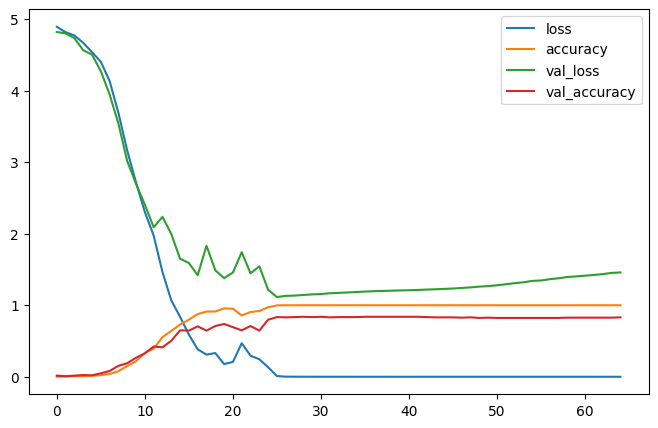

8/8 [==============================] - 0s 39ms/step
Accuracy: 83.06451612903226
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

<Figure size 640x480 with 0 Axes>

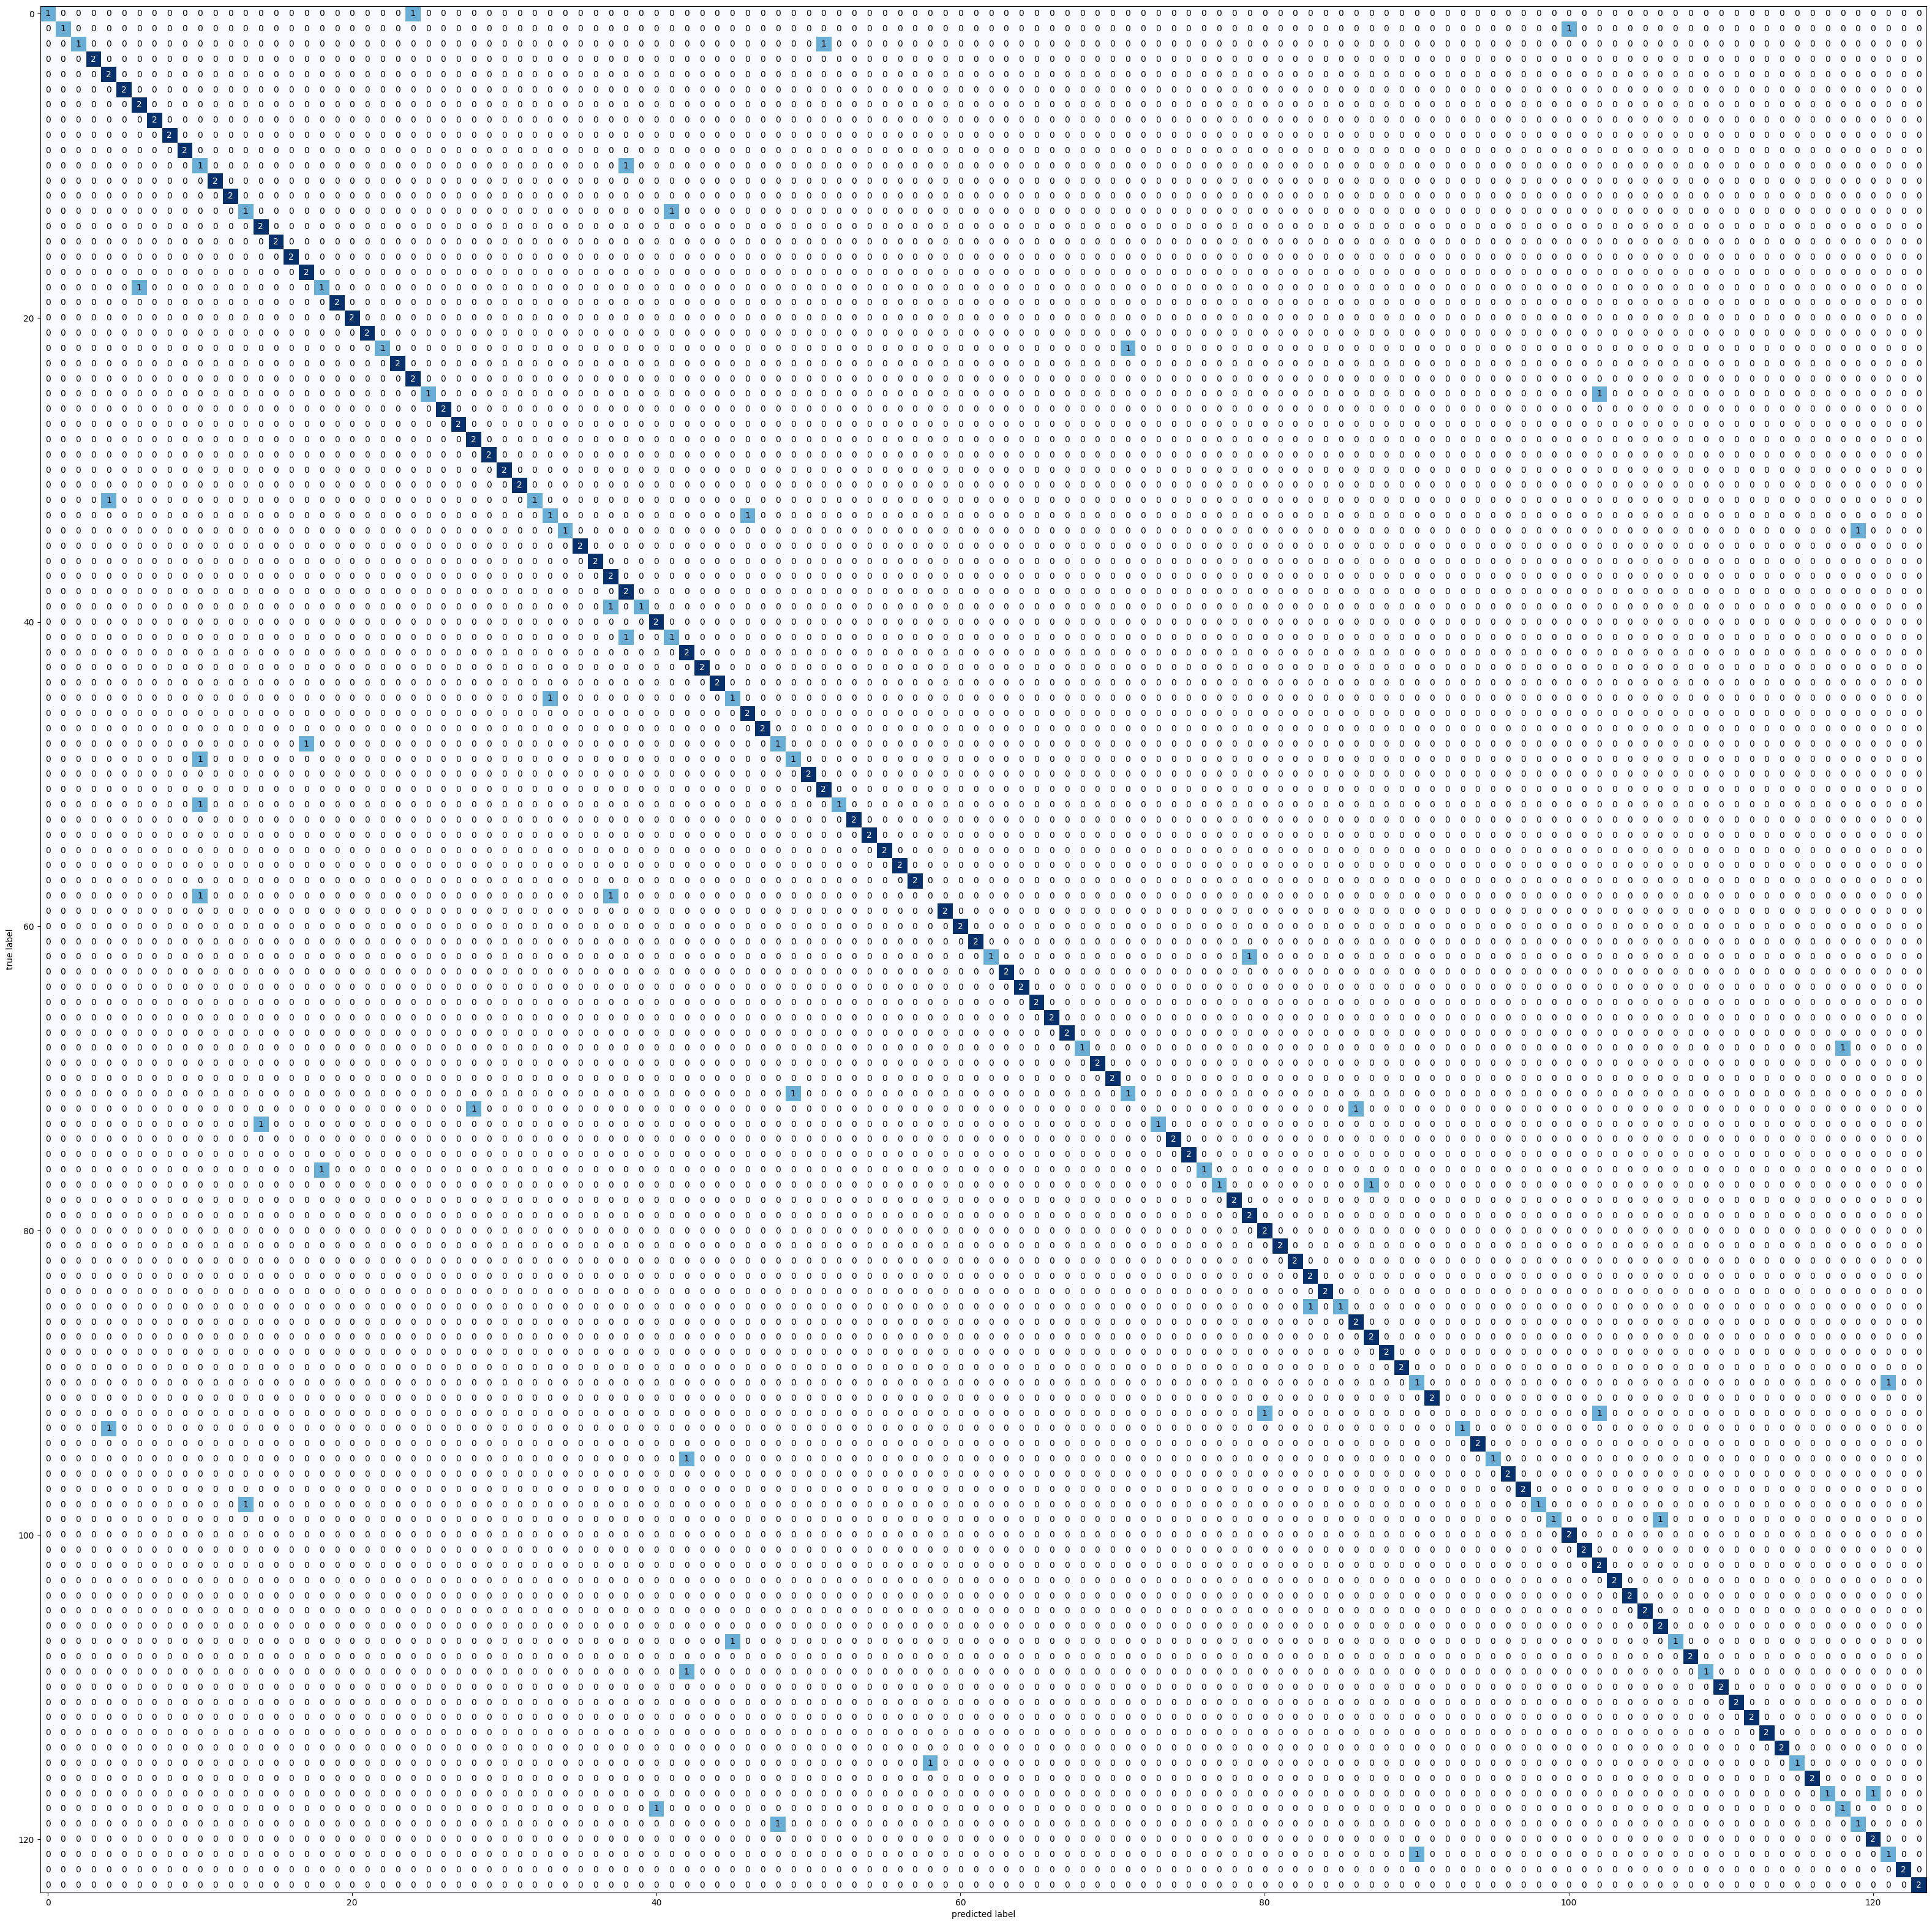

In [5]:
numpy.set_printoptions(threshold=sys.maxsize)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

images1 = "/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/TrainNormal"
files1= os.listdir(images1)
#print(files1)
X_train = [imread('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/TrainNormal/'+f) for f in files1]   # Getting Training Images
for f in files1:
    Y_train.append(f[7:10])
for i in range(0, len(Y_train)):
    Y_train[i] = int(Y_train[i])
#print(Y_train)
images2 = '/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/TestBags+Normal-B'
files2= os.listdir(images2)
#print(files2)
X_test = [imread("/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/TestBags+Normal-B/"+f) for f in files2]
for f in files2:
    Y_test.append(f[7:10])

for i in range(0, len(Y_test)):
    Y_test[i] = int(Y_test[i])
#print(Y_test)

X_train=np.array(X_train)
X_test=np.array(X_test)

img_rows=240
img_cols=240
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test=label_encoder.fit_transform(Y_test)
Y_train= label_encoder.fit_transform(Y_train)

print(Y_train)
print(Y_test)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = 124
epochs = 65
MODEL_NAME = 'TrainedModelFile-{}-{}.model'.format("0.0001", 'TenLayers')
model = Sequential()
model.add(Conv2D(16,3, 3,input_shape=(240, 240, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(124, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(ZeroPadding2D(padding=((0,1),(0,1))))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
batch_size = 4

model.add(Dense(124, activation='softmax'))


print(model.summary())
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

import time
start_time=time.time()
history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs,validation_data=(X_test, Y_test))
#history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs)
print('Training took {} seconds'.format(time.time()-start_time))
#model.save(MODEL_NAME)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/Curves.png')

from sklearn.metrics import accuracy_score

test_predictions = model.predict(X_test)


accuracy = accuracy_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1))*100
print("Accuracy: " + str(accuracy))
from sklearn.metrics import precision_score, recall_score
precision_score= precision_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1), average=None)

recall_score= recall_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1),average=None)
from sklearn.metrics import f1_score
F1=f1_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1), average=None)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1))
print(results)
from sklearn.metrics import classification_report
list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
#print(list3)
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1)))

list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
#print(list3)


labels=pd.DataFrame()
labels["ClassLabel"]=list3
labels["Precision"]=precision_score
labels["Recallvalue"]=recall_score
labels["F1Score"]=F1
labels.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/File.csv')

'''
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Results')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/AccuracyCurve.png')
plt.show()
plt.close()
'''
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss Results')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/LossCurve.png')
plt.show()
plt.close()
'''
fig, ax = plot_confusion_matrix(conf_mat=results,colorbar=False,show_absolute=True,show_normed=False,figsize=(40,40))
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/ConfusionMatrix.png')
plt.show()
plt.close()
arr = np.array(results)

df = pd.DataFrame(arr)

df.columns = list3
df["Rows/Col"]=list3
df.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Bags/File2.csv')


+Coats

[  0   0   1   1   0   2   3   3   3   1   2   0   2   2   1   4   5   5
   4   7   7   4   6   5   7   5   6   3   6   4   6   9  11   9  10   8
   8   9  11  11   7  11  10   8   8   9  10  10   9  16  13  12  14  13
  15  15  12  14  14  12  15  13  15  13  12  14  16  16  17  18  20  20
  17  20  18  19  17  19  17  18  19  16  18  19  24  24  23  22  21  20
  22  24  22  23  23  21  24  21  22  21  23  28  26  27  26  27  29  28
  26  26  27  25  28  25  27  25  28  25  31  32  32  30  30  32  32  29
  30  31  29  31  29  31  30  33  37  34  36  35  33  33  35  34  36  36
  35  35  36  34  33  37  34  40  41  38  41  38  37  39  41  40  37  39
  39  40  38  38  40  39  44  41  43  43  43  44  42  45  44  42  42  43
  44  42  49  48  47  48  46  46  48  45  46  46  45  47  48  47  45  49
  47  52  51  50  50  50  53  51  50  52  52  49  51  52  51  49  57  56
  53  54  53  54  56  55  55  56  54  54  57  53  55  55  56  59  60  61
  58  58  58  59  57  59  57  60  60  60  59  58  6

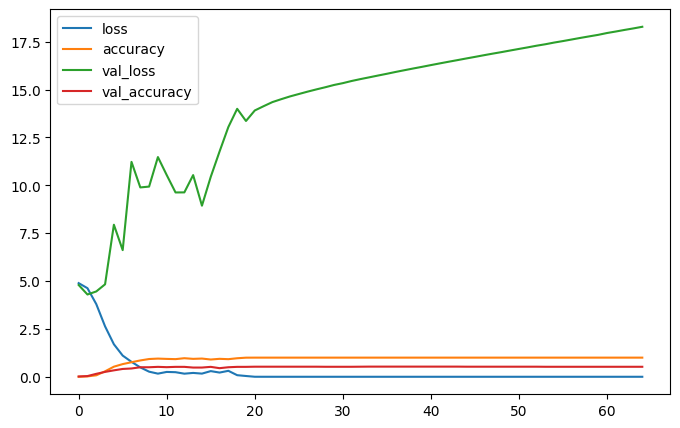

8/8 [==============================] - 0s 39ms/step
Accuracy: 52.226720647773284
[[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


<Figure size 640x480 with 0 Axes>

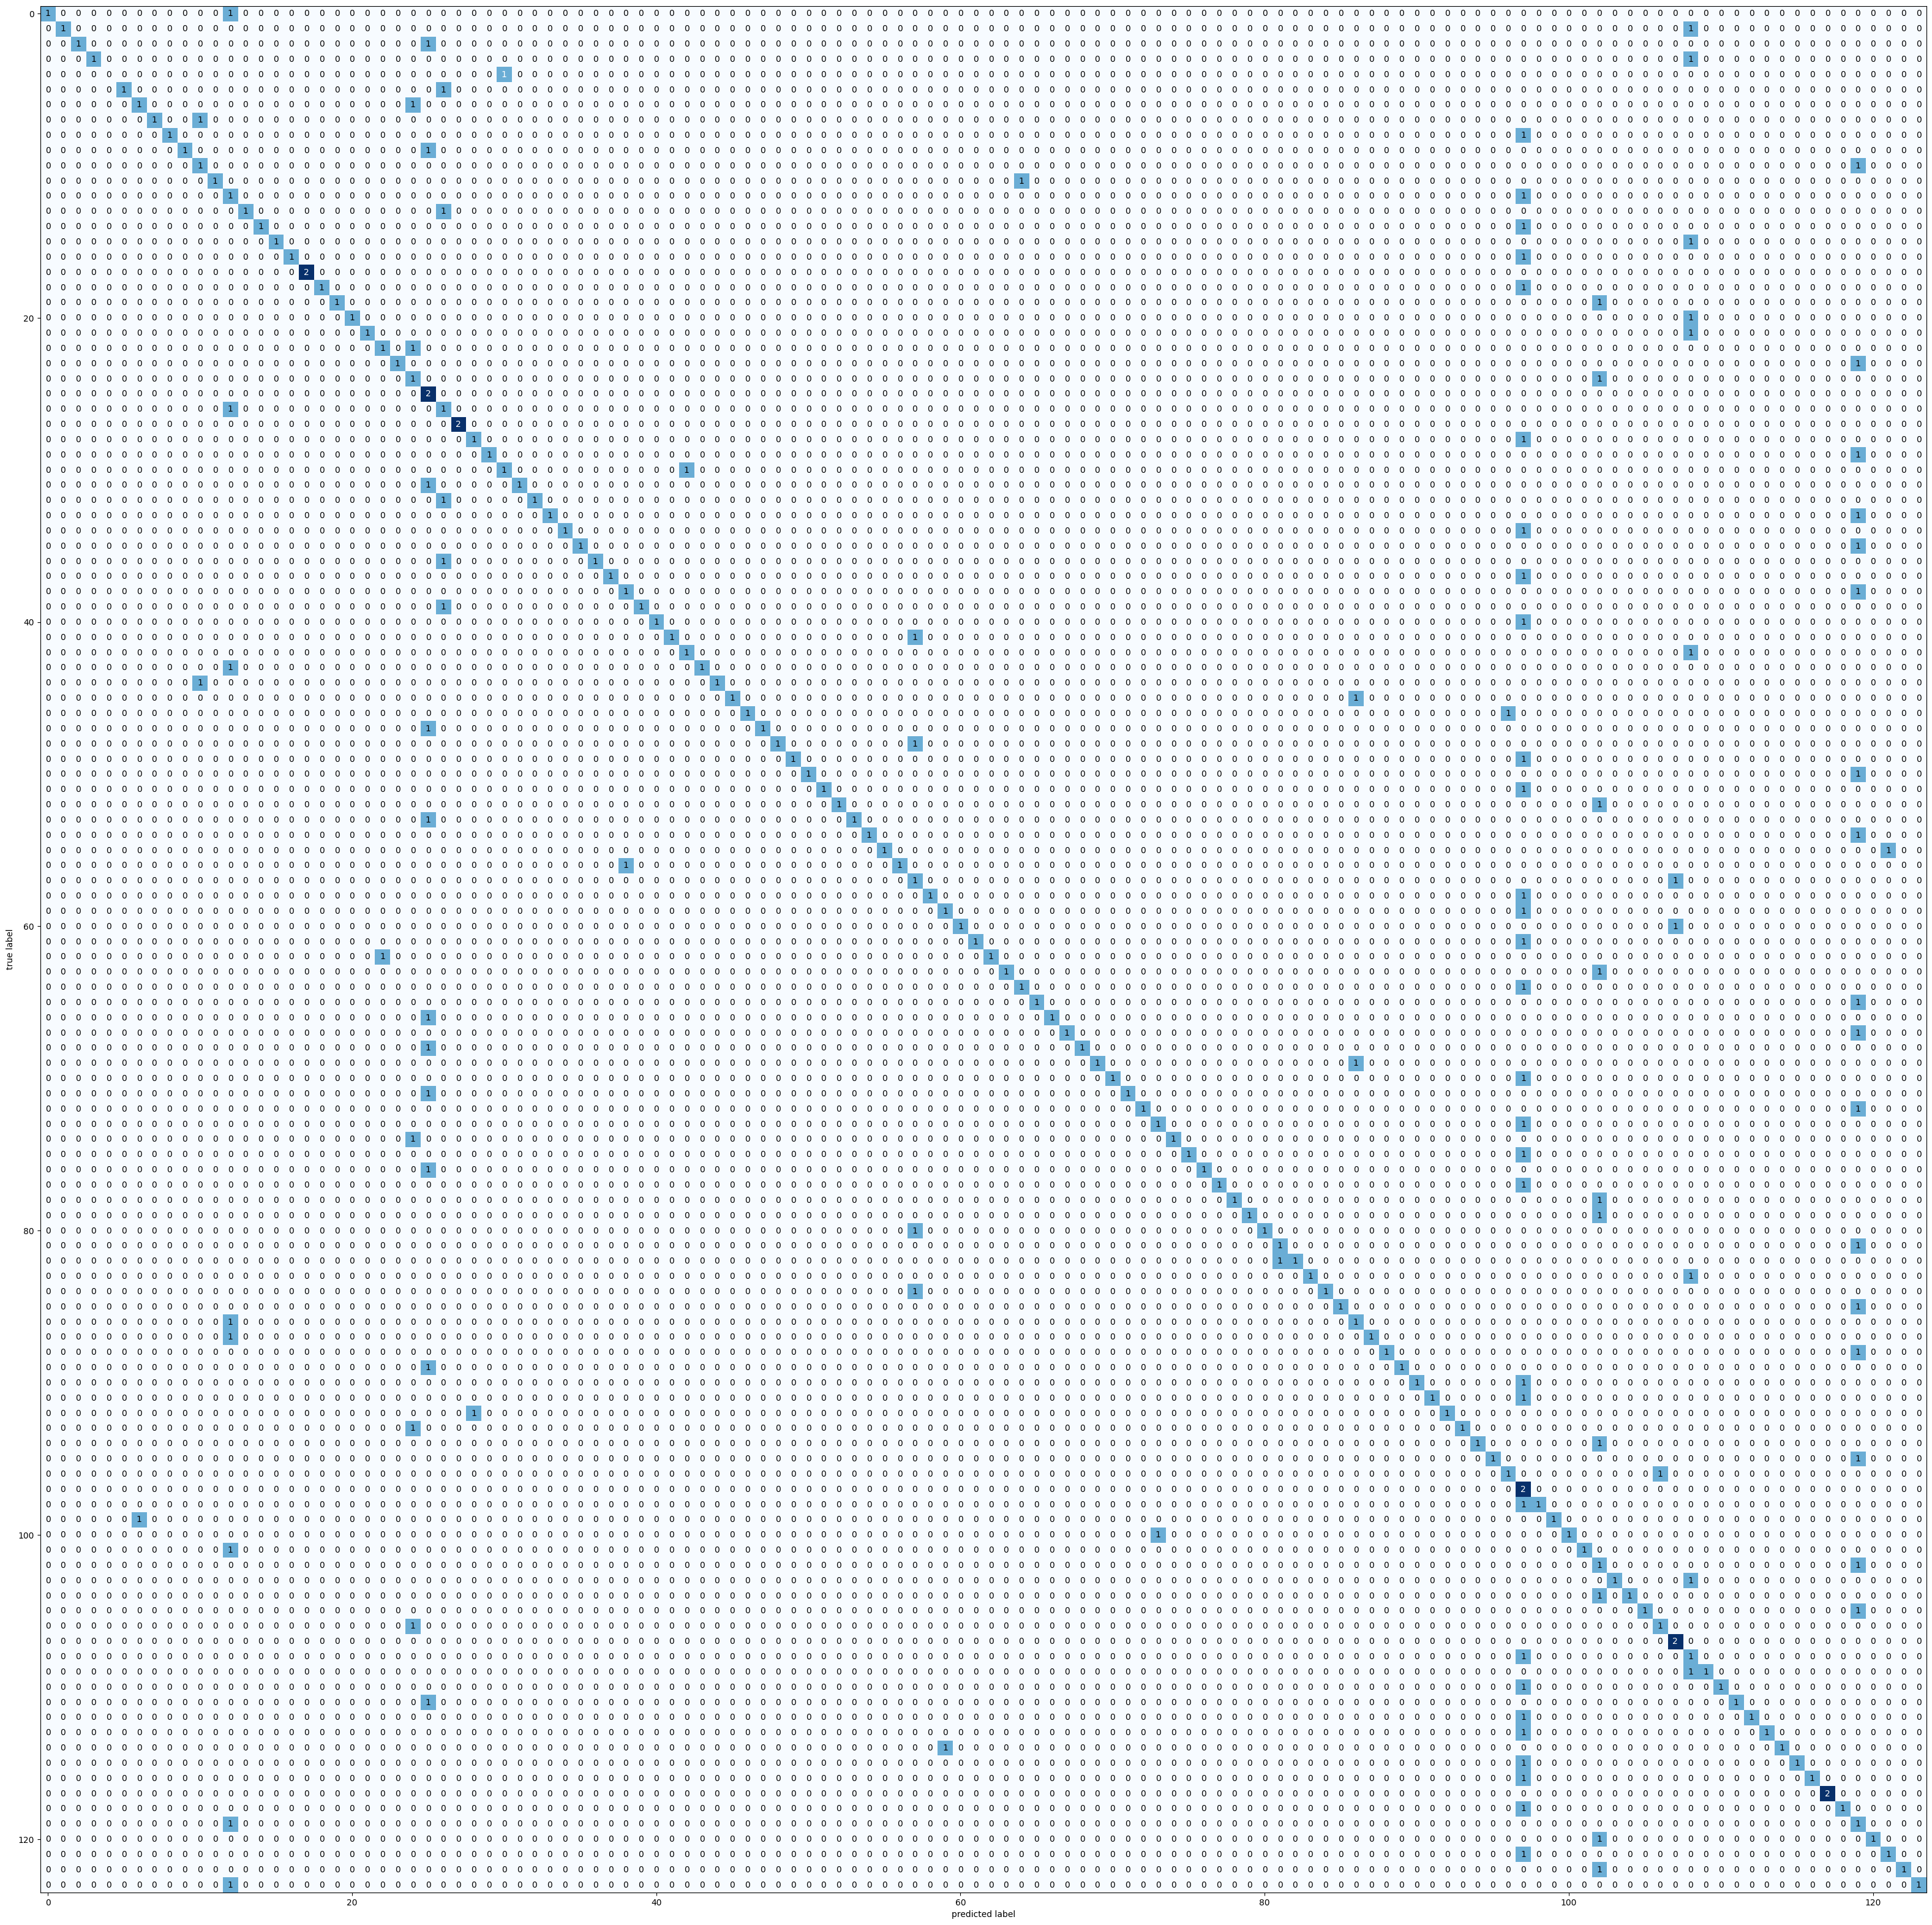

In [6]:
numpy.set_printoptions(threshold=sys.maxsize)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

images1 = "/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/TrainNormal"
files1= os.listdir(images1)
#print(files1)
X_train = [imread('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/TrainNormal/'+f) for f in files1]   # Getting Training Images
for f in files1:
    Y_train.append(f[7:10])
for i in range(0, len(Y_train)):
    Y_train[i] = int(Y_train[i])
#print(Y_train)
images2 = '/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/TestCoats+Normal-C'
files2= os.listdir(images2)
#print(files2)
X_test = [imread("/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/TestCoats+Normal-C/"+f) for f in files2]
for f in files2:
    Y_test.append(f[7:10])

for i in range(0, len(Y_test)):
    Y_test[i] = int(Y_test[i])
#print(Y_test)

X_train=np.array(X_train)
X_test=np.array(X_test)

img_rows=240
img_cols=240
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test=label_encoder.fit_transform(Y_test)
Y_train= label_encoder.fit_transform(Y_train)

print(Y_train)
print(Y_test)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = 124
epochs = 65
MODEL_NAME = 'TrainedModelFile-{}-{}.model'.format("0.0001", 'TenLayers')
model = Sequential()
model.add(Conv2D(16,3, 3,input_shape=(240, 240, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(124, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(ZeroPadding2D(padding=((0,1),(0,1))))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
batch_size = 4

model.add(Dense(124, activation='softmax'))


print(model.summary())
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

import time
start_time=time.time()
history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs,validation_data=(X_test, Y_test))
#history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs)
print('Training took {} seconds'.format(time.time()-start_time))
#model.save(MODEL_NAME)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/Curves.png')

from sklearn.metrics import accuracy_score

test_predictions = model.predict(X_test)


accuracy = accuracy_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1))*100
print("Accuracy: " + str(accuracy))
from sklearn.metrics import precision_score, recall_score
precision_score= precision_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1), average=None)

recall_score= recall_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1),average=None)
from sklearn.metrics import f1_score
F1=f1_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1), average=None)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1))
print(results)
from sklearn.metrics import classification_report
list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
#print(list3)
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1)))

list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
#print(list3)


labels=pd.DataFrame()
labels["ClassLabel"]=list3
labels["Precision"]=precision_score
labels["Recallvalue"]=recall_score
labels["F1Score"]=F1
labels.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/File.csv')

'''
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Results')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/AccuracyCurve.png')
plt.show()
plt.close()
'''
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss Results')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/LossCurve.png')
plt.show()
plt.close()
'''
fig, ax = plot_confusion_matrix(conf_mat=results,colorbar=False,show_absolute=True,show_normed=False,figsize=(40,40))
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/ConfusionMatrix.png')
plt.show()
plt.close()
arr = np.array(results)

df = pd.DataFrame(arr)

df.columns = list3
df["Rows/Col"]=list3
df.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/Normal+Coats/File2.csv')


toCoats

[  0   0   0   0   1   1   1   2   2   2   2   1   3   3   3   3   4   5
   5   4   4   4   6   5   6   6   5   6   7   7   7   7   8   8   8   8
   9   9  10   9   9  10  10  11  10  11  11  12  12  12  12  11  13  13
  13  13  14  14  14  14  15  15  15  15  16  16  16  17  17  17  17  16
  18  18  18  19  18  19  19  19  20  20  21  20  20  21  22  21  22  21
  22  22  23  23  23  23  24  24  24  25  24  25  25  26  25  26  26  26
  27  27  27  28  27  29  28  29  28  28  29  30  30  30  30  29  31  31
  31  31  32  33  32  32  33  32  33  33  34  34  35  35  34  34  35  36
  35  36  36  36  37  37  37  37  38  38  38  39  38  40  40  39  39  39
  41  40  41  41  40  41  42  42  42  42  43  43  43  43  44  44  44  45
  44  45  45  45  46  46  46  47  47  46  47  47  48  48  48  48  49  49
  49  50  49  50  50  50  51  51  51  51  52  52  52  52  53  53  53  53
  54  54  54  54  55  56  55  55  55  56  56  56  57  57  57  58  57  58
  59  58  58  60  59  60  59  60  59  61  61  61  6

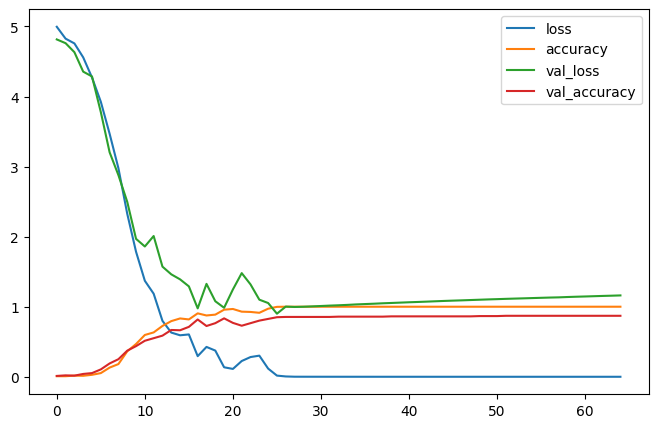

8/8 [==============================] - 0s 40ms/step
Accuracy: 87.04453441295547
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

<Figure size 640x480 with 0 Axes>

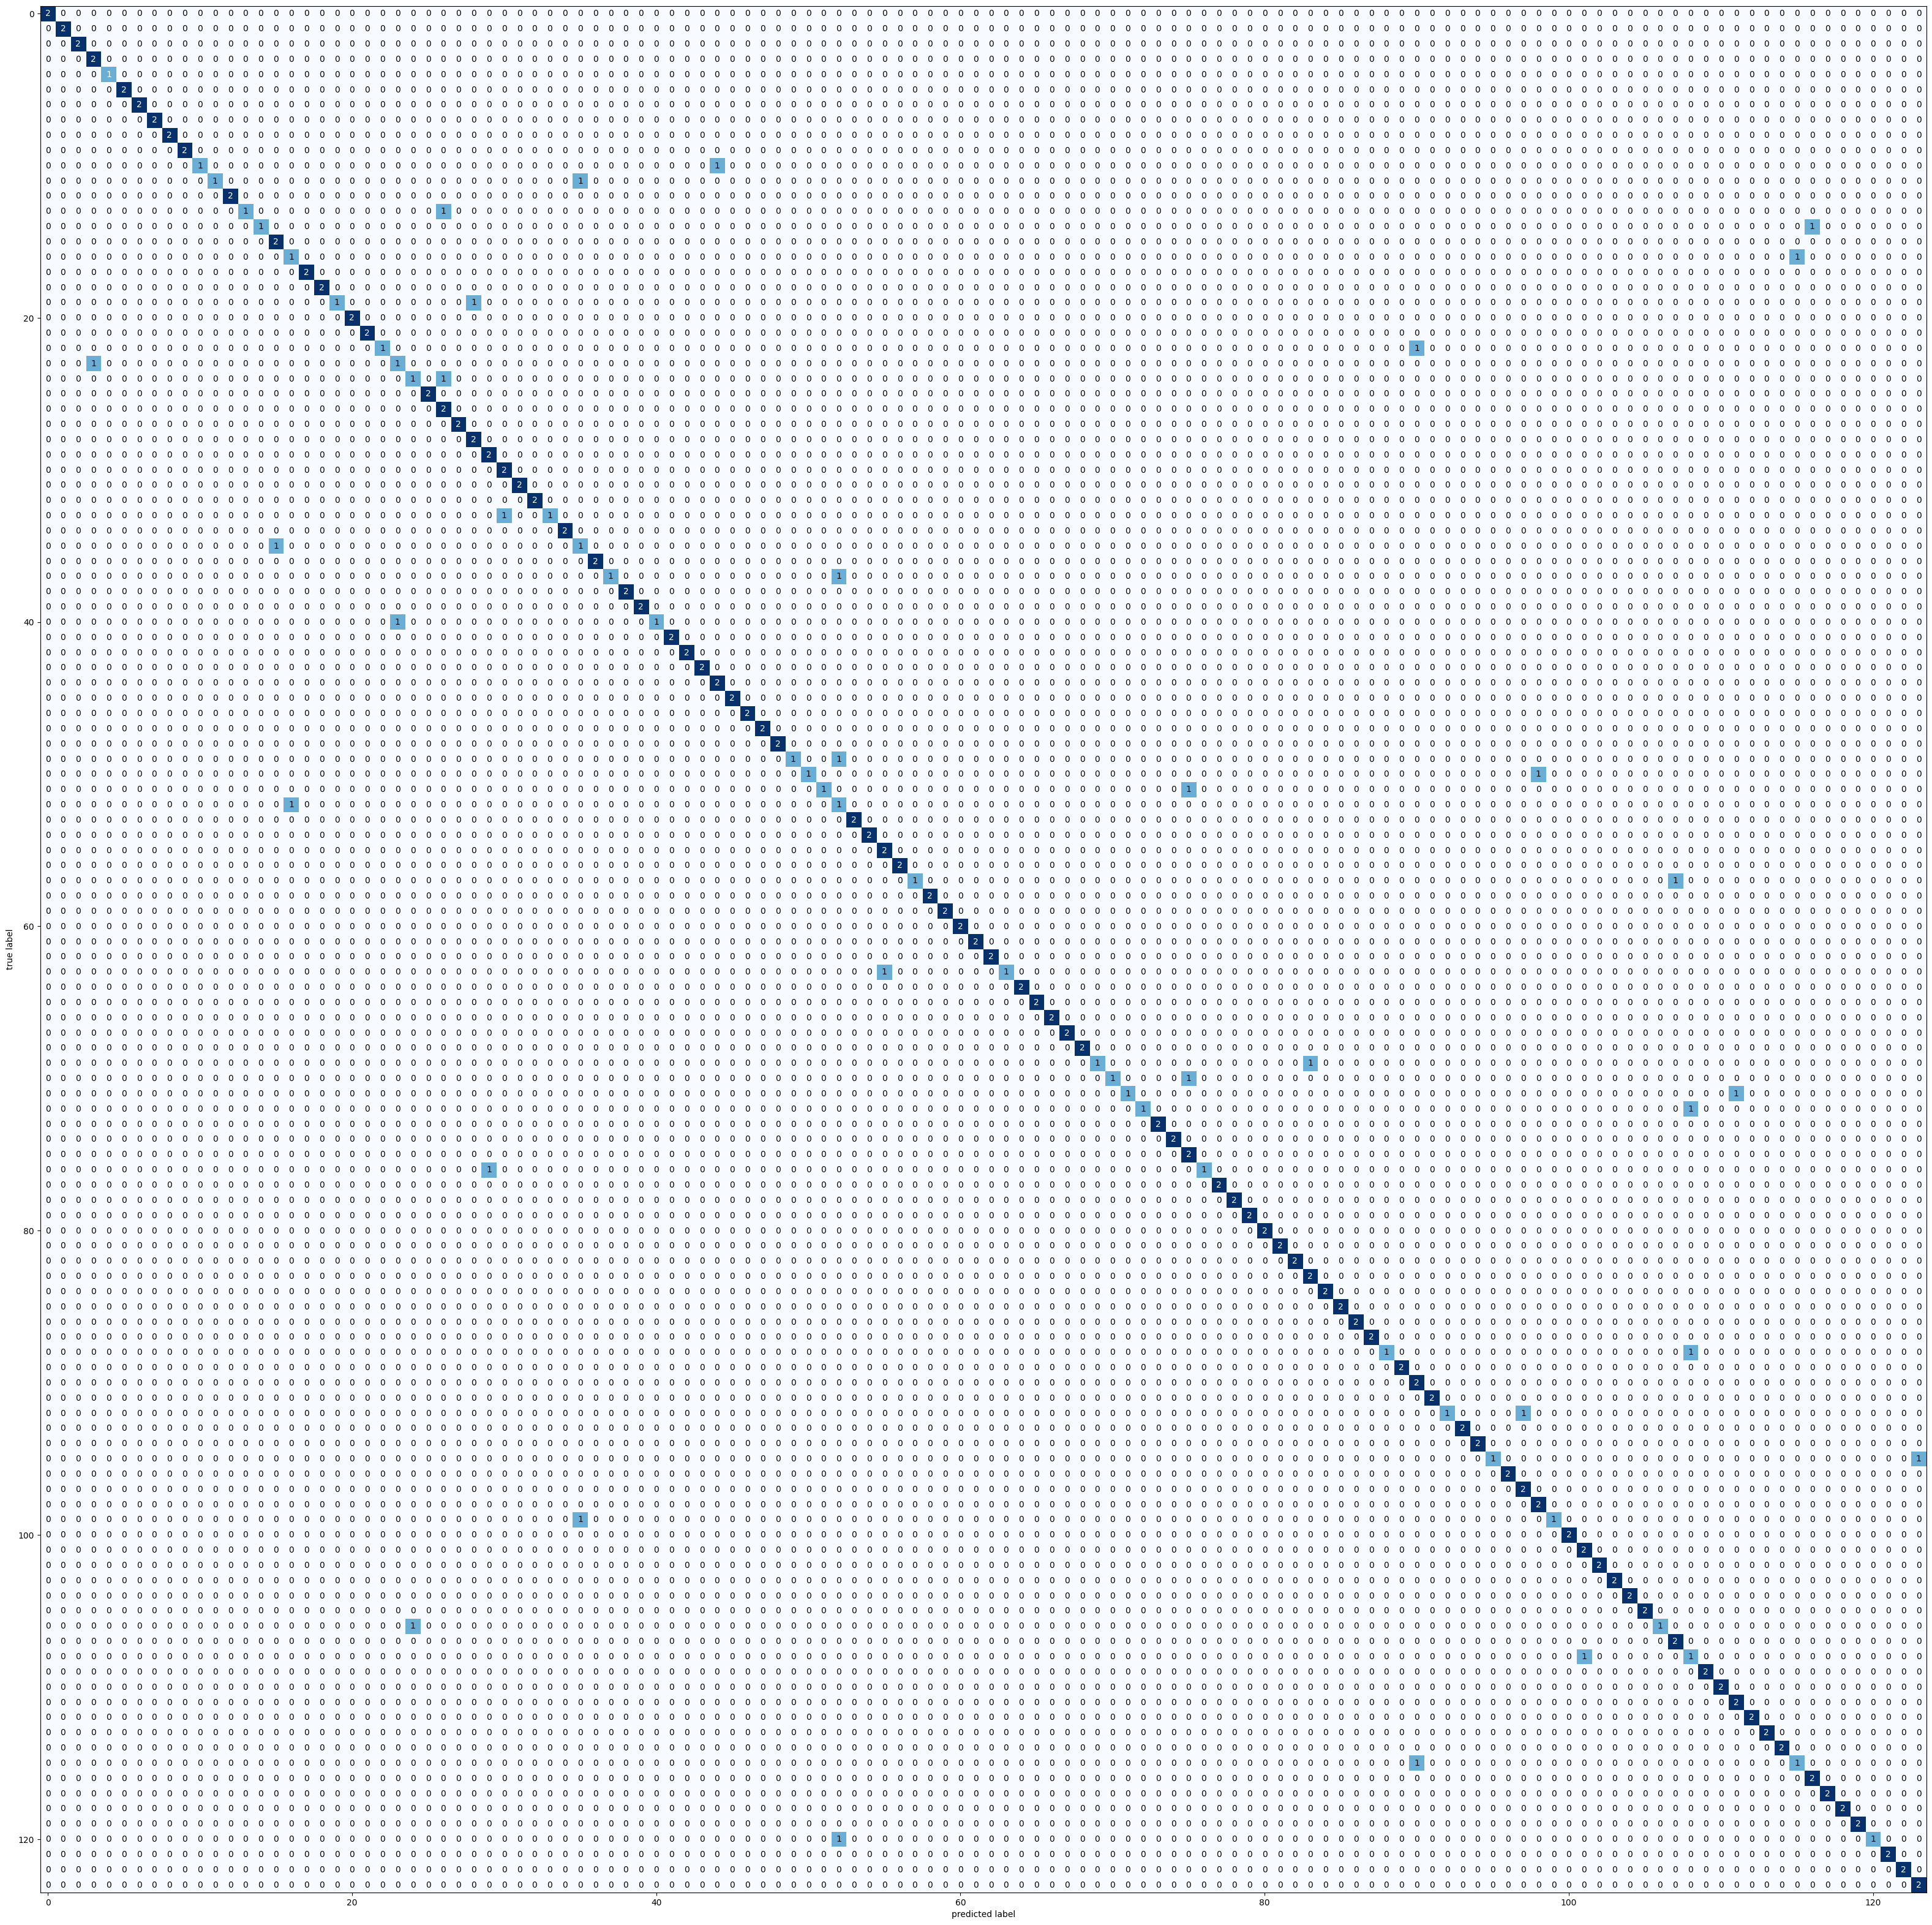

In [7]:
numpy.set_printoptions(threshold=sys.maxsize)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

images1 = "/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/TrainNormal"
files1= os.listdir(images1)
#print(files1)
X_train = [imread('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/TrainNormal/'+f) for f in files1]   # Getting Training Images
for f in files1:
    Y_train.append(f[7:10])
for i in range(0, len(Y_train)):
    Y_train[i] = int(Y_train[i])
#print(Y_train)
images2 = '/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/TestCoats'
files2= os.listdir(images2)
#print(files2)
X_test = [imread("/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/TestCoats/"+f) for f in files2]
for f in files2:
    Y_test.append(f[7:10])

for i in range(0, len(Y_test)):
    Y_test[i] = int(Y_test[i])
#print(Y_test)

X_train=np.array(X_train)
X_test=np.array(X_test)

img_rows=240
img_cols=240
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test=label_encoder.fit_transform(Y_test)
Y_train= label_encoder.fit_transform(Y_train)

print(Y_train)
print(Y_test)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = 124
epochs = 65
MODEL_NAME = 'TrainedModelFile-{}-{}.model'.format("0.0001", 'TenLayers')
model = Sequential()
model.add(Conv2D(16,3, 3,input_shape=(240, 240, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(124, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(ZeroPadding2D(padding=((0,1),(0,1))))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
batch_size = 4

model.add(Dense(124, activation='softmax'))


print(model.summary())
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

import time
start_time=time.time()
history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs,validation_data=(X_test, Y_test))
#history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs)
print('Training took {} seconds'.format(time.time()-start_time))
#model.save(MODEL_NAME)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/Curves.png')

from sklearn.metrics import accuracy_score

test_predictions = model.predict(X_test)


accuracy = accuracy_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1))*100
print("Accuracy: " + str(accuracy))
from sklearn.metrics import precision_score, recall_score
precision_score= precision_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1), average=None)

recall_score= recall_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1),average=None)
from sklearn.metrics import f1_score
F1=f1_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1), average=None)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1))
print(results)
from sklearn.metrics import classification_report
list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
#print(list3)
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1)))

list3=[]
for i in range(1,125):
    list3.append("Person"+str(i))
#print(list3)


labels=pd.DataFrame()
labels["ClassLabel"]=list3
labels["Precision"]=precision_score
labels["Recallvalue"]=recall_score
labels["F1Score"]=F1
labels.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/File.csv')

'''
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Results')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/AccuracyCurve.png')
plt.show()
plt.close()
'''
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss Results')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/LossCurve.png')
plt.show()
plt.close()
'''
fig, ax = plot_confusion_matrix(conf_mat=results,colorbar=False,show_absolute=True,show_normed=False,figsize=(40,40))
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/ConfusionMatrix.png')
plt.show()
plt.close()
arr = np.array(results)

df = pd.DataFrame(arr)

df.columns = list3
df["Rows/Col"]=list3
df.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/NormalToCoats/File2.csv')


Speed Eperiments

Normal

[  0   1   0   0   1   2   2   1   3   3   3   4   4   2   6   6   4   5
   5   5   7   6   8   7   8   7   9  10   9   8   9  10  11  11  10  12
  11  12  12  13  13  14  13  16  14  15  15  15  14  17  16  17  17  16
  18  19  19  18  19  18  21  21  20  20  20  23  21  22  22  22  24  23
  23  24  25  24  26  25  26  25  27  26  27  29  28  28  27  28  30  29
  30  29  30  31  32  32  32  31  31  34  33  34  34  33  33  36  35  36
  35  35  36  37  37  38  38  38  37  40  40  39  39  39  42  41  40  41
  41  42  44  43  43  42  43  44  44  45  45  45  46  47  47  46  47  46
  49  49  49  48  48  48  51  50  50  51  50  51  53  53  52  52  52  53
  55  54  55  54  54  55  56  56  57  57  56  57  58  59  58  58  59  59
  60  61  60  61  60  62  63  62  62  61  64  63  64  63  64  65  66  65
  66  66  65  68  68  68  67  67  67  70  69  69  69  71  70  72  71  71
  70  73  72  74  73  73  72  75  75  74  76  74  75  77  77  76  77  76
  78  78  79  78  80  79  79  80  81  80  82  82  8

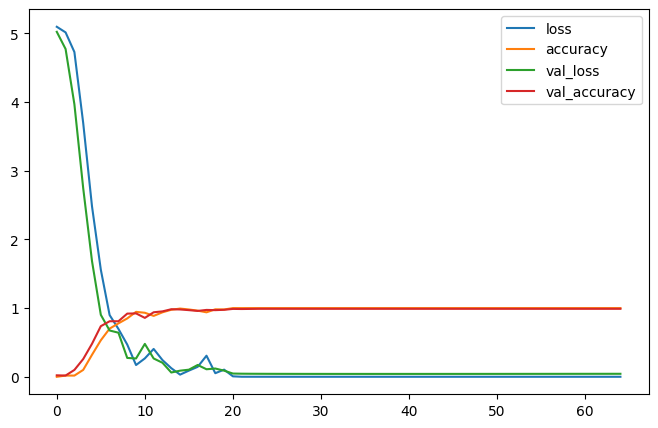

20/20 [==============================] - 1s 66ms/step
Accuracy: 99.01960784313727
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

<Figure size 640x480 with 0 Axes>

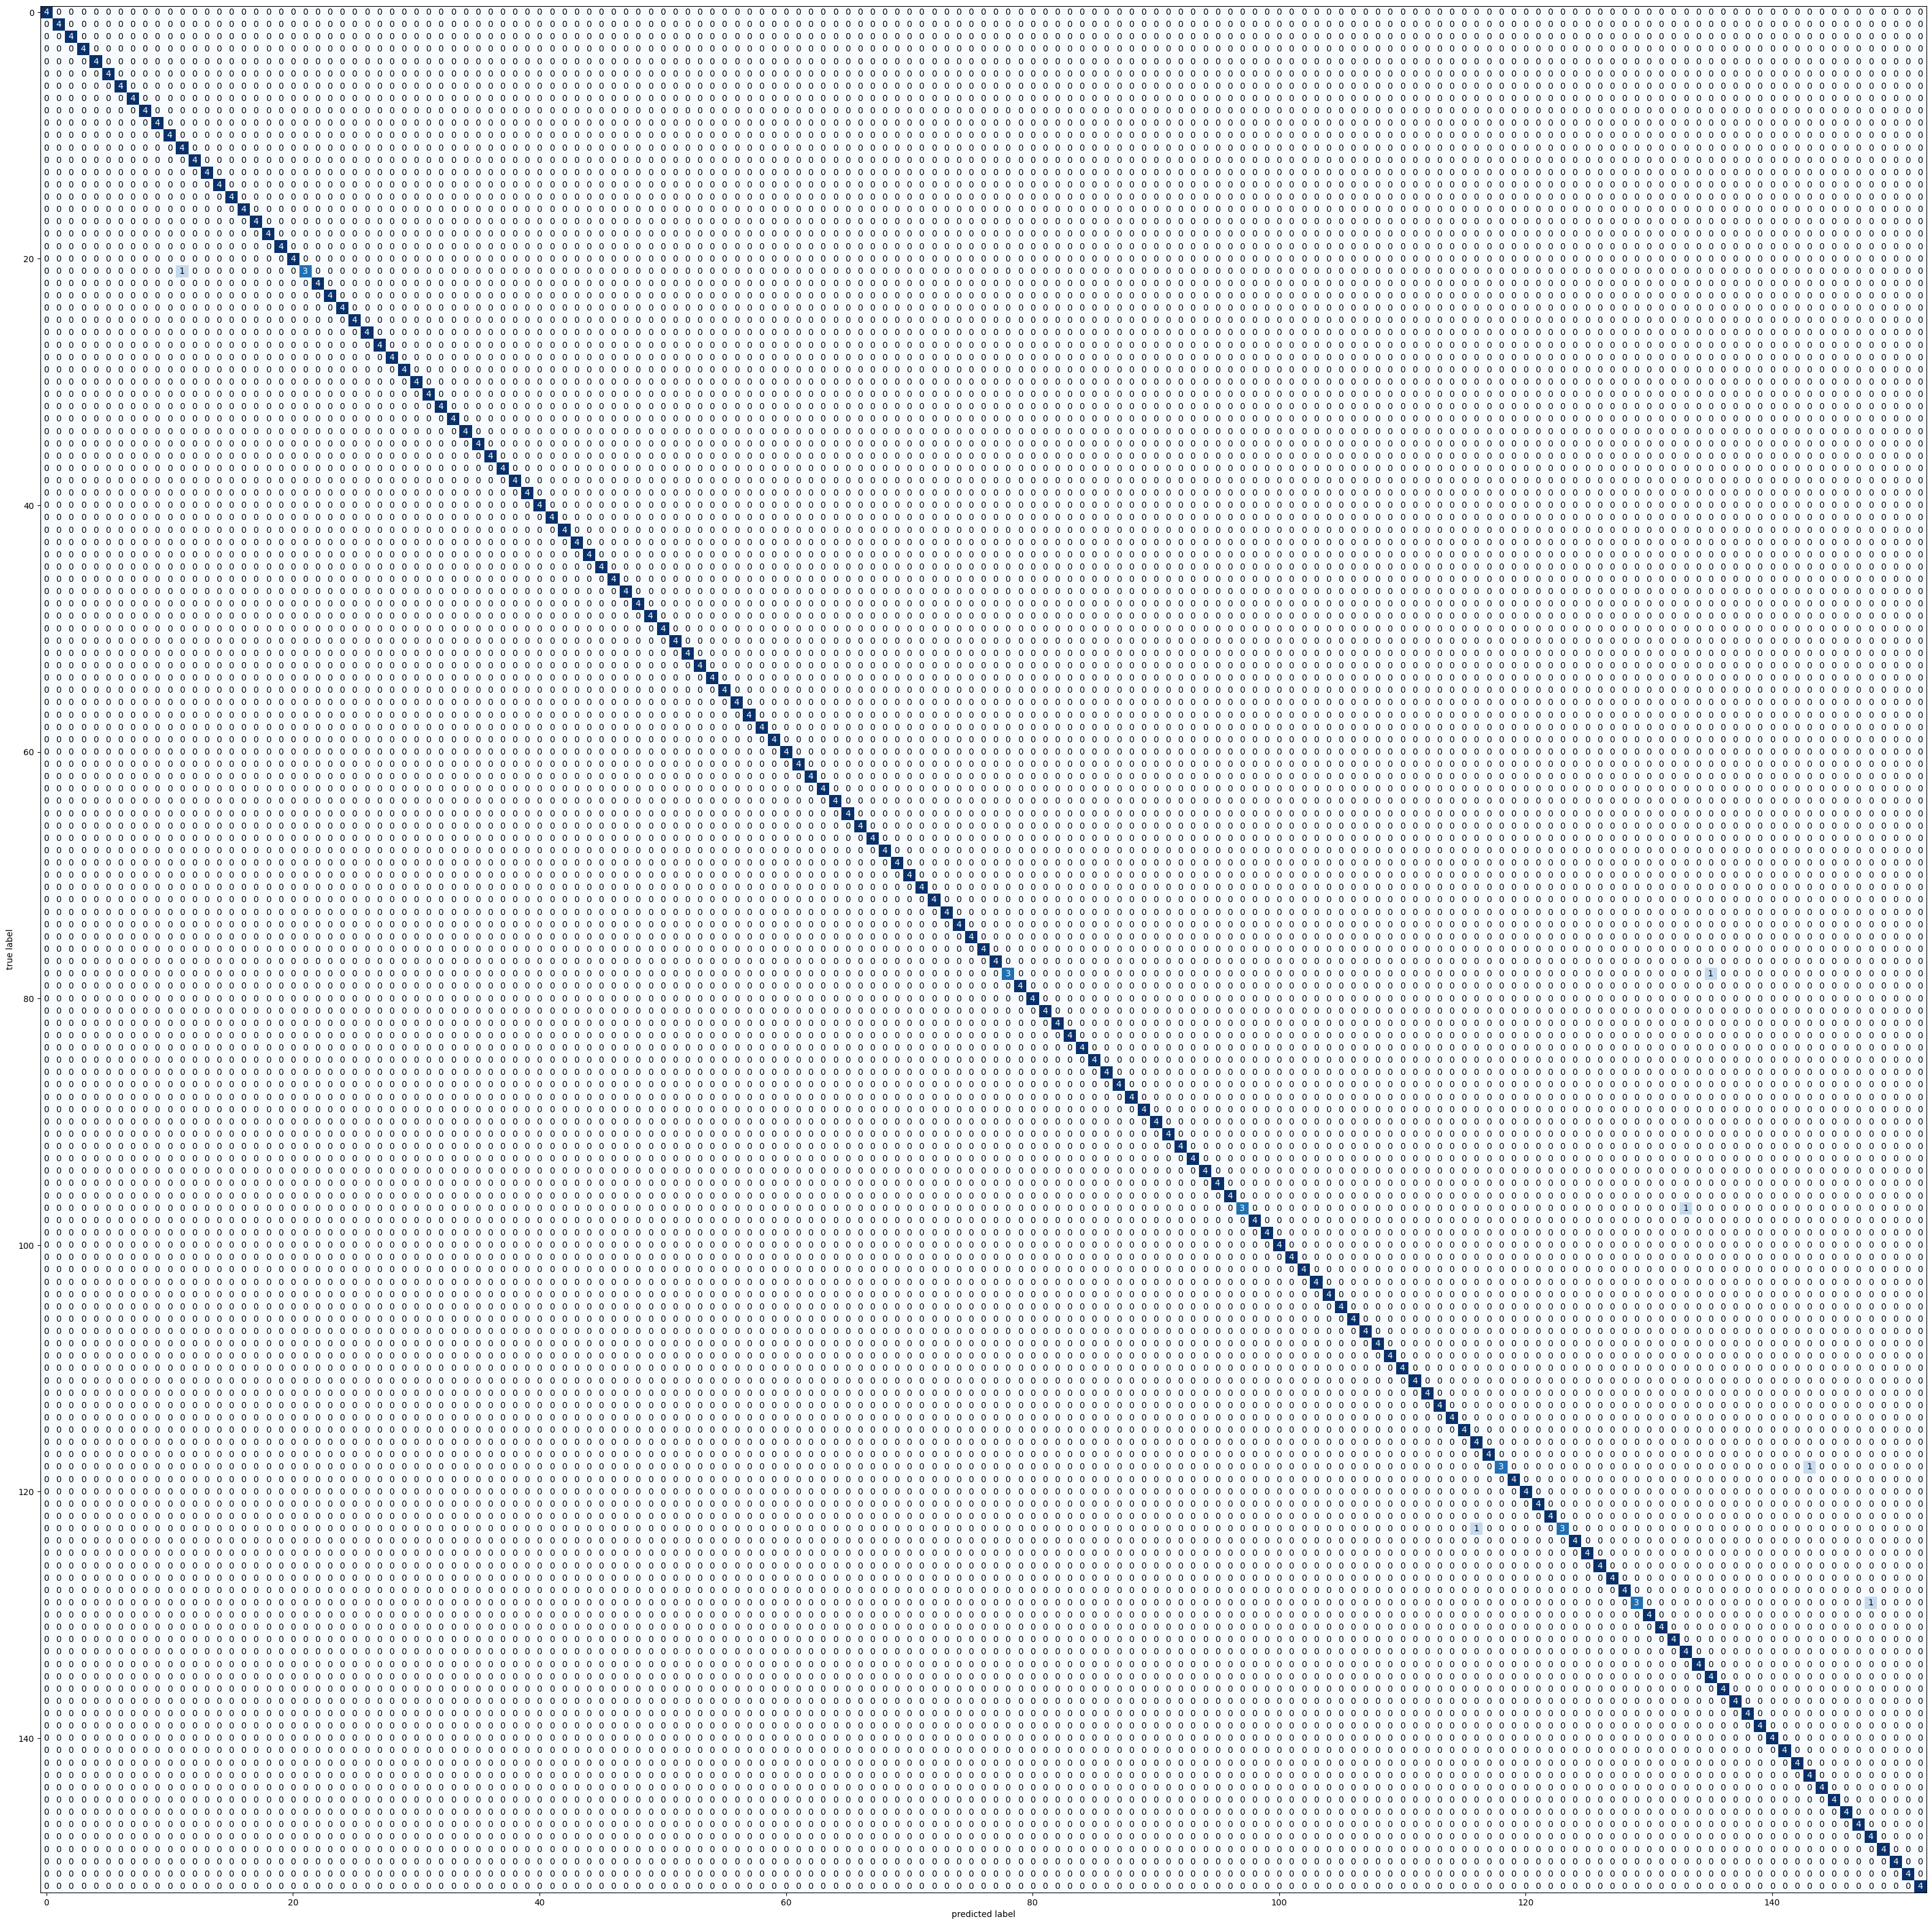

In [8]:
numpy.set_printoptions(threshold=sys.maxsize)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

images1 = "/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/TrainNormalSpeed"
files1= os.listdir(images1)
#print(files1)
X_train = [imread('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/TrainNormalSpeed/'+f) for f in files1]   # Getting Training Images
for f in files1:
    Y_train.append(f[7:10])
for i in range(0, len(Y_train)):
    Y_train[i] = int(Y_train[i])
#print(Y_train)
images2 = '/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/TestNormalSpeed'
files2= os.listdir(images2)
#print(files2)
X_test = [imread("/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/TestNormalSpeed/"+f) for f in files2]
for f in files2:
    Y_test.append(f[7:10])

for i in range(0, len(Y_test)):
    Y_test[i] = int(Y_test[i])
#print(Y_test)

X_train=np.array(X_train)
X_test=np.array(X_test)

img_rows=240
img_cols=240
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test=label_encoder.fit_transform(Y_test)
Y_train= label_encoder.fit_transform(Y_train)

print(Y_train)
print(Y_test)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = 153
epochs = 65
MODEL_NAME = 'TrainedModelFile-{}-{}.model'.format("0.0001", 'TenLayers')
model = Sequential()
model.add(Conv2D(16,3, 3,input_shape=(240, 240, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(124, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(ZeroPadding2D(padding=((0,1),(0,1))))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
batch_size = 4

model.add(Dense(153, activation='softmax'))


print(model.summary())
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

import time
start_time=time.time()
history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs,validation_data=(X_test, Y_test))
#history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs)
print('Training took {} seconds'.format(time.time()-start_time))
#model.save(MODEL_NAME)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/Curves.png')

from sklearn.metrics import accuracy_score

test_predictions = model.predict(X_test)


accuracy = accuracy_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1))*100
print("Accuracy: " + str(accuracy))
from sklearn.metrics import precision_score, recall_score
precision_score= precision_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1), average=None)

recall_score= recall_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1),average=None)
from sklearn.metrics import f1_score
F1=f1_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1), average=None)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1))
print(results)
from sklearn.metrics import classification_report
list3=[]
for i in range(1,154):
    list3.append("Person"+str(i))
#print(list3)
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1)))

list3=[]
for i in range(1,154):
    list3.append("Person"+str(i))
#print(list3)


labels=pd.DataFrame()
labels["ClassLabel"]=list3
labels["Precision"]=precision_score
labels["Recallvalue"]=recall_score
labels["F1Score"]=F1
labels.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/File.csv')

'''
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Results')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/AccuracyCurve.png')
plt.show()
plt.close()
'''
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss Results')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/LossCurve.png')
plt.show()
plt.close()
'''
fig, ax = plot_confusion_matrix(conf_mat=results,colorbar=False,show_absolute=True,show_normed=False,figsize=(40,40))
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/ConfusionMatrix.png')
plt.show()
plt.close()
arr = np.array(results)

df = pd.DataFrame(arr)

df.columns = list3
df["Rows/Col"]=list3
df.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/NormalToNormal/File2.csv')


Slow

[  0   0   0   1   1   0   2   2   1   2   1   2   3   3   3   4   4   3
   4   4   6   5   5   5   5   6   6   6   7   7   7   7   8   8   8   9
   9   9   9   8  10  11  10  10  11  10  12  12  11  11  12  13  13  13
  12  13  15  14  14  14  14  16  15  16  15  15  16  16  17  17  17  17
  18  18  18  18  19  19  20  19  20  19  21  20  21  20  21  22  22  22
  21  23  23  23  22  24  23  24  24  25  24  26  26  25  25  25  27  27
  26  27  27  26  28  29  28  28  28  29  29  30  29  30  30  31  31  31
  30  32  32  31  33  33  32  33  33  32  34  34  34  35  34  35  36  35
  35  36  37  37  36  36  37  37  38  38  38  39  40  38  39  39  39  40
  41  40  41  40  41  42  41  42  42  43  43  42  43  43  44  44  44  45
  44  45  46  46  45  45  46  47  46  47  47  47  49  48  48  48  48  49
  49  50  49  50  50  50  51  51  51  51  52  52  52  52  53  54  53  54
  53  53  55  55  54  54  56  56  55  55  56  57  57  56  57  59  58  57
  58  58  58  59  59  60  59  61  61  60  60  60  6

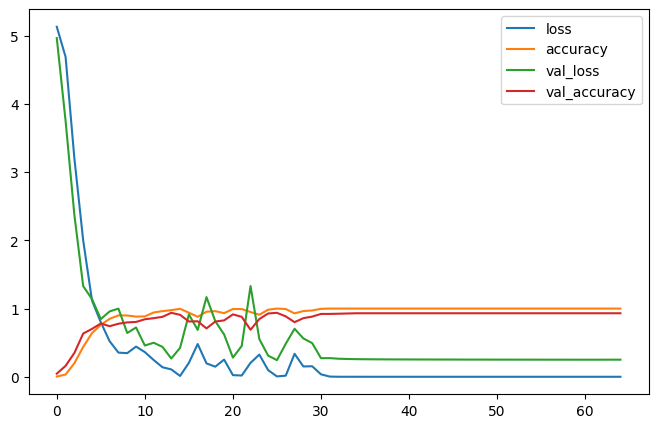

10/10 [==============================] - 1s 63ms/step
Accuracy: 93.13725490196079
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

<Figure size 640x480 with 0 Axes>

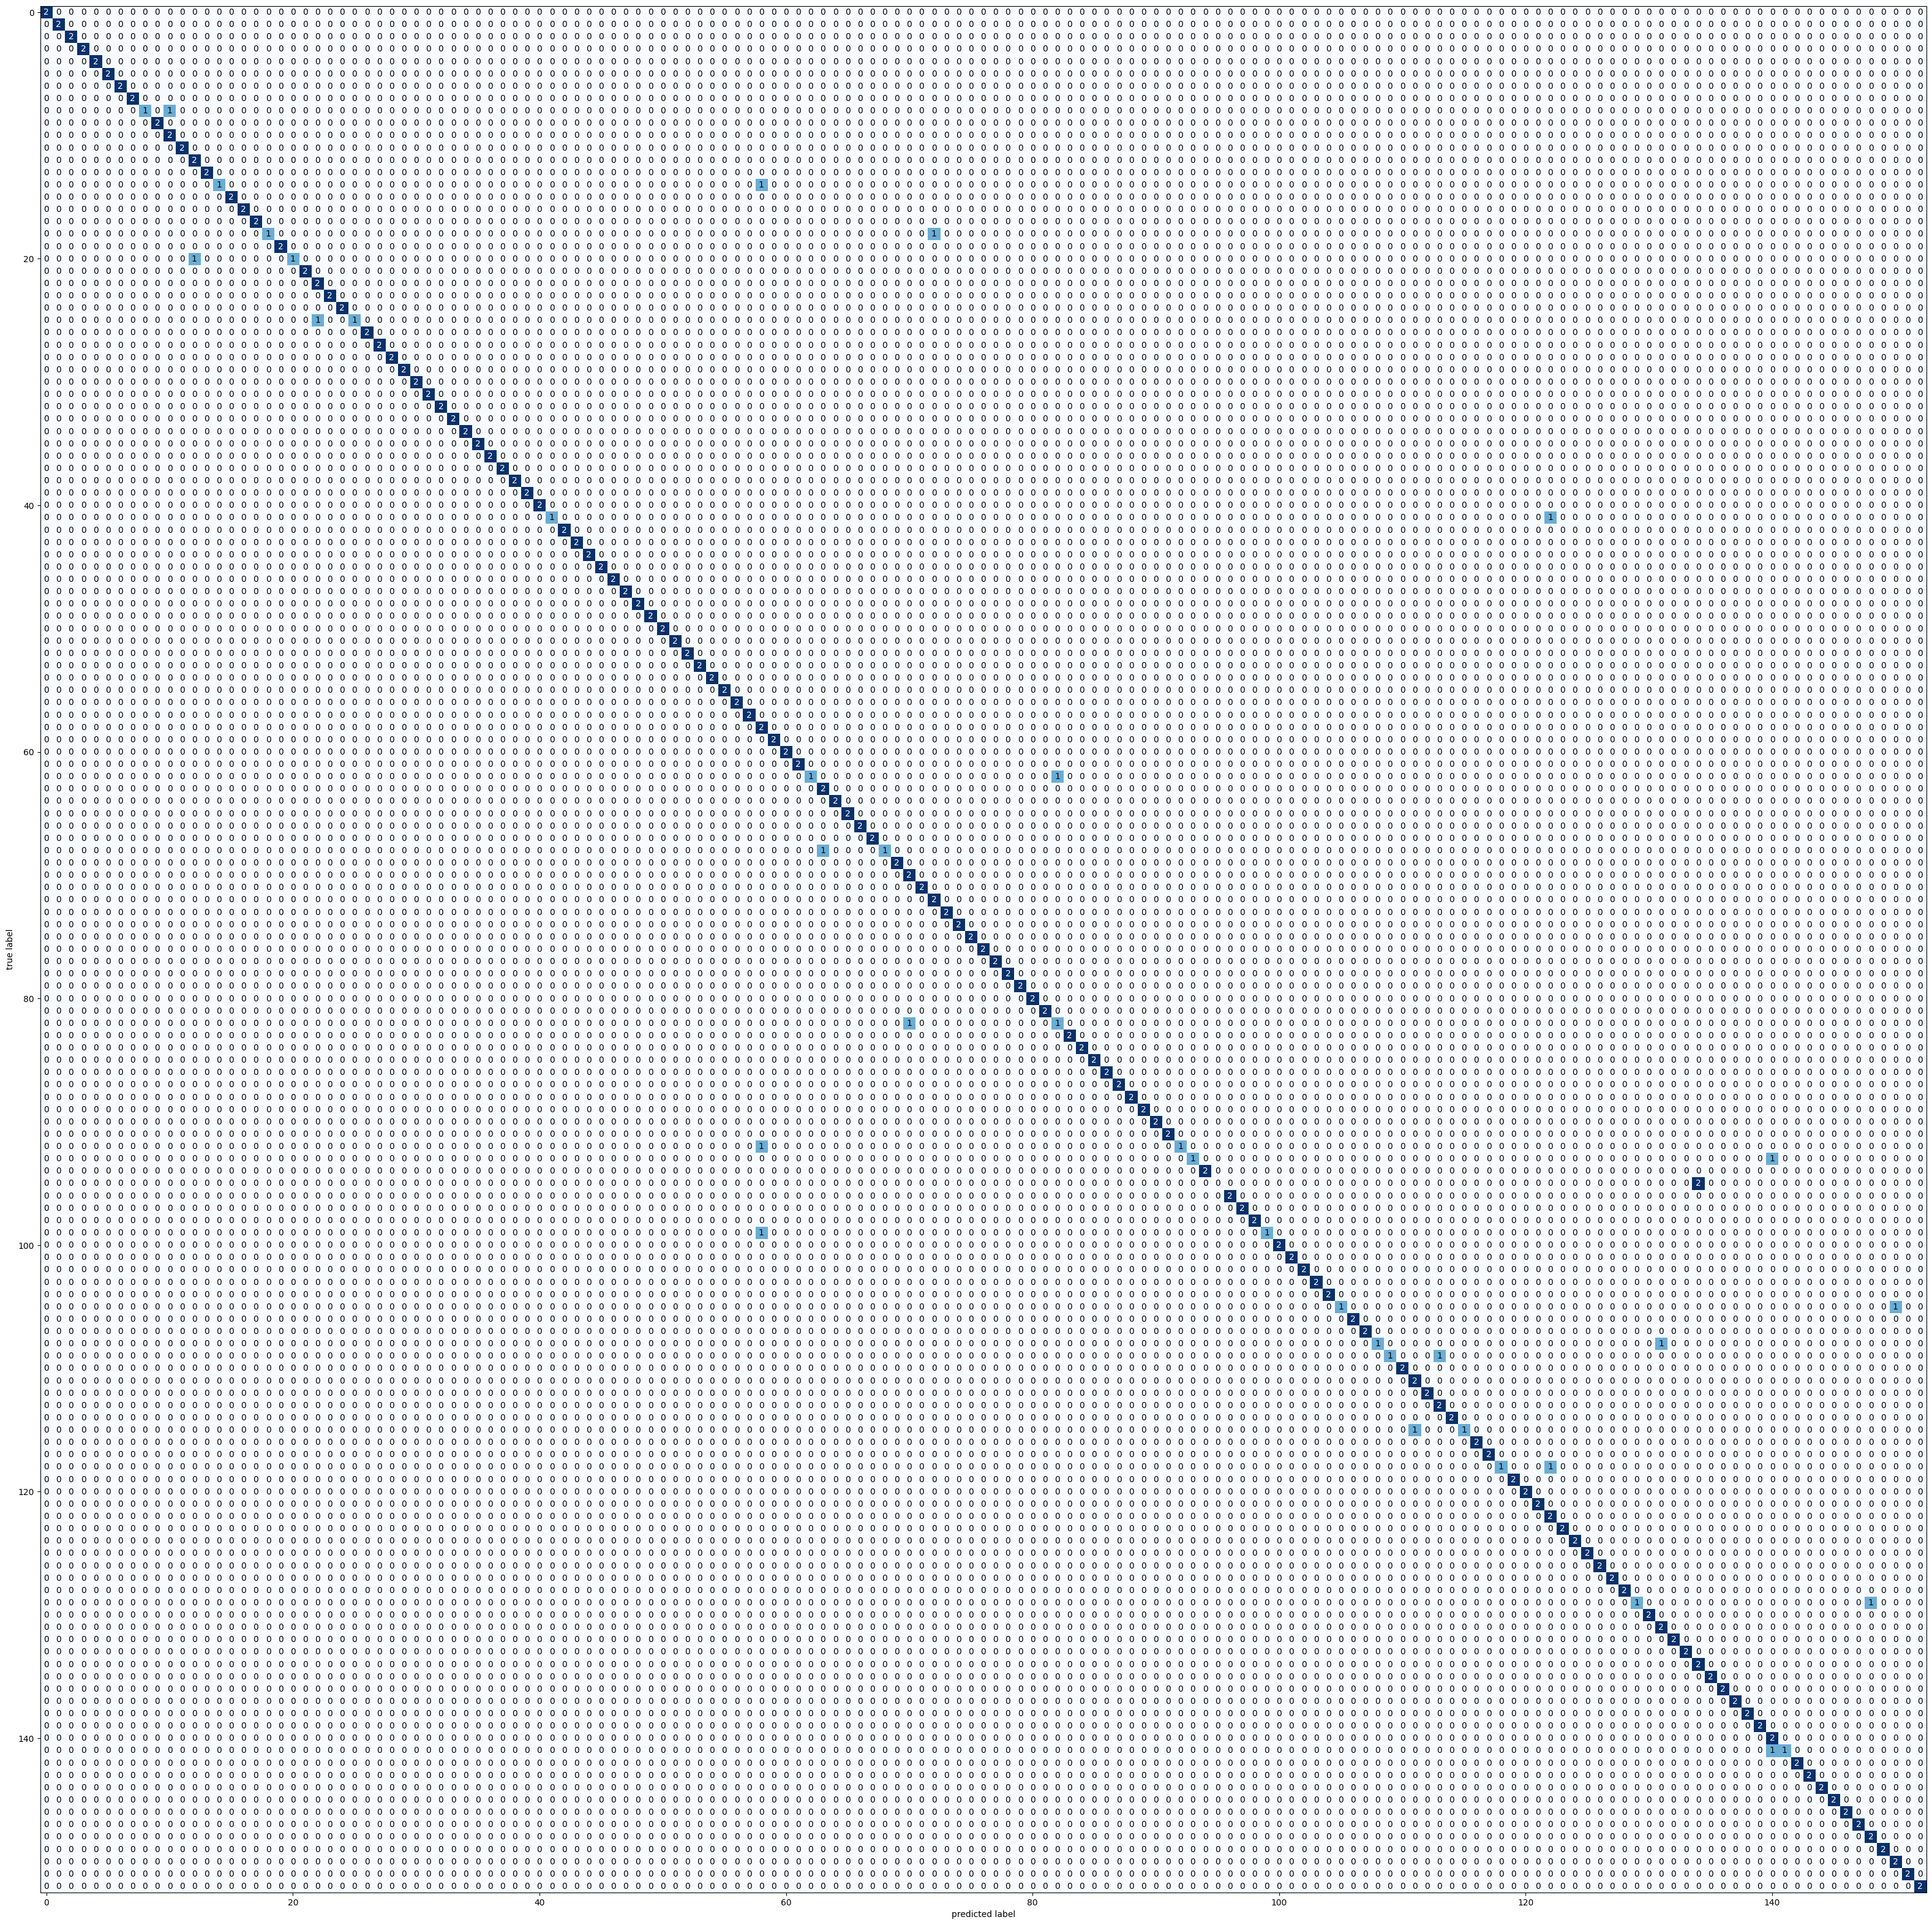

In [9]:
numpy.set_printoptions(threshold=sys.maxsize)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

images1 = "/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/TrainNormal+Slow"
files1= os.listdir(images1)
#print(files1)
X_train = [imread('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/TrainNormal+Slow/'+f) for f in files1]   # Getting Training Images
for f in files1:
    Y_train.append(f[7:10])
for i in range(0, len(Y_train)):
    Y_train[i] = int(Y_train[i])
#print(Y_train)
images2 = '/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/TestNormal+Slow'
files2= os.listdir(images2)
#print(files2)
X_test = [imread("/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/TestNormal+Slow/"+f) for f in files2]
for f in files2:
    Y_test.append(f[7:10])

for i in range(0, len(Y_test)):
    Y_test[i] = int(Y_test[i])
#print(Y_test)

X_train=np.array(X_train)
X_test=np.array(X_test)

img_rows=240
img_cols=240
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test=label_encoder.fit_transform(Y_test)
Y_train= label_encoder.fit_transform(Y_train)

print(Y_train)
print(Y_test)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = 153
epochs = 65
MODEL_NAME = 'TrainedModelFile-{}-{}.model'.format("0.0001", 'TenLayers')
model = Sequential()
model.add(Conv2D(16,3, 3,input_shape=(240, 240, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(124, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(ZeroPadding2D(padding=((0,1),(0,1))))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
batch_size = 4

model.add(Dense(153, activation='softmax'))


print(model.summary())
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

import time
start_time=time.time()
history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs,validation_data=(X_test, Y_test))
#history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs)
print('Training took {} seconds'.format(time.time()-start_time))
#model.save(MODEL_NAME)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/Curves.png')

from sklearn.metrics import accuracy_score

test_predictions = model.predict(X_test)


accuracy = accuracy_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1))*100
print("Accuracy: " + str(accuracy))
from sklearn.metrics import precision_score, recall_score
precision_score= precision_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1), average=None)

recall_score= recall_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1),average=None)
from sklearn.metrics import f1_score
F1=f1_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1), average=None)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1))
print(results)
from sklearn.metrics import classification_report
list3=[]
for i in range(1,154):
    list3.append("Person"+str(i))
#print(list3)
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1)))

list3=[]
for i in range(1,154):
    list3.append("Person"+str(i))
#print(list3)


labels=pd.DataFrame()
labels["ClassLabel"]=list3
labels["Precision"]=precision_score
labels["Recallvalue"]=recall_score
labels["F1Score"]=F1
labels.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/File.csv')

'''
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Results')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/AccuracyCurve.png')
plt.show()
plt.close()
'''
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss Results')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/LossCurve.png')
plt.show()
plt.close()
'''
fig, ax = plot_confusion_matrix(conf_mat=results,colorbar=False,show_absolute=True,show_normed=False,figsize=(40,40))
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/ConfusionMatrix.png')
plt.show()
plt.close()
arr = np.array(results)

df = pd.DataFrame(arr)

df.columns = list3
df["Rows/Col"]=list3
df.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Slow/File2.csv')


Fast

[  0   0   0   1   0   1   1   1   2   2   2   2   3   3   3   3   4   4
   4   4   5   5   6   5   5   7   6   6   7   6   8   7   7   8   8   9
   9   8  10   9   9  10  10  11  10  11  11  11  12  12  12  12  13  13
  13  13  14  14  14  14  15  15  15  16  15  16  16  17  16  17  17  17
  18  18  18  18  19  19  19  20  20  19  20  20  21  21  21  21  22  22
  23  22  22  23  23  23  24  24  24  25  24  25  26  25  25  26  27  26
  26  28  27  27  27  28  28  29  28  29  29  29  30  30  30  30  32  31
  31  31  31  32  32  33  32  34  33  33  33  35  34  34  34  35  36  35
  36  35  36  37  37  36  37  38  37  38  38  38  39  39  39  39  40  40
  40  40  41  41  41  41  42  42  42  43  42  43  43  44  44  43  44  44
  45  45  45  46  45  46  46  46  47  48  47  47  47  48  48  49  48  50
  49  49  49  50  51  50  51  51  50  51  52  52  52  52  53  53  53  53
  54  54  54  54  55  56  55  55  55  56  56  57  57  57  56  57  58  58
  58  59  58  59  59  59  60  60  60  60  61  61  6

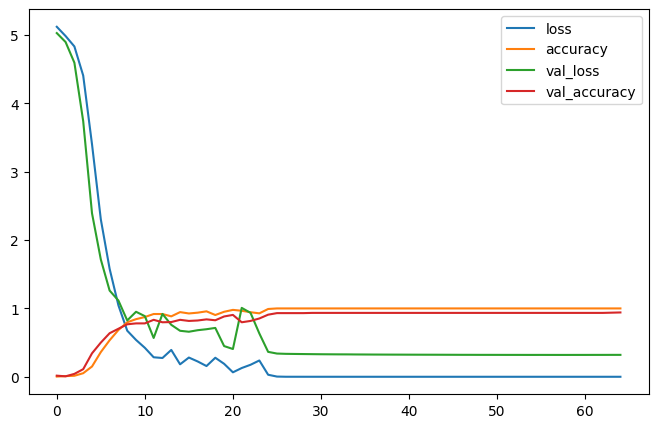

10/10 [==============================] - 0s 47ms/step - loss: 0.3206 - accuracy: 0.9412
Test loss:  0.32060888409614563
Test Acc:  0.9411764740943909
10/10 [==============================] - 1s 76ms/step
Accuracy: 94.11764705882352
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

<Figure size 640x480 with 0 Axes>

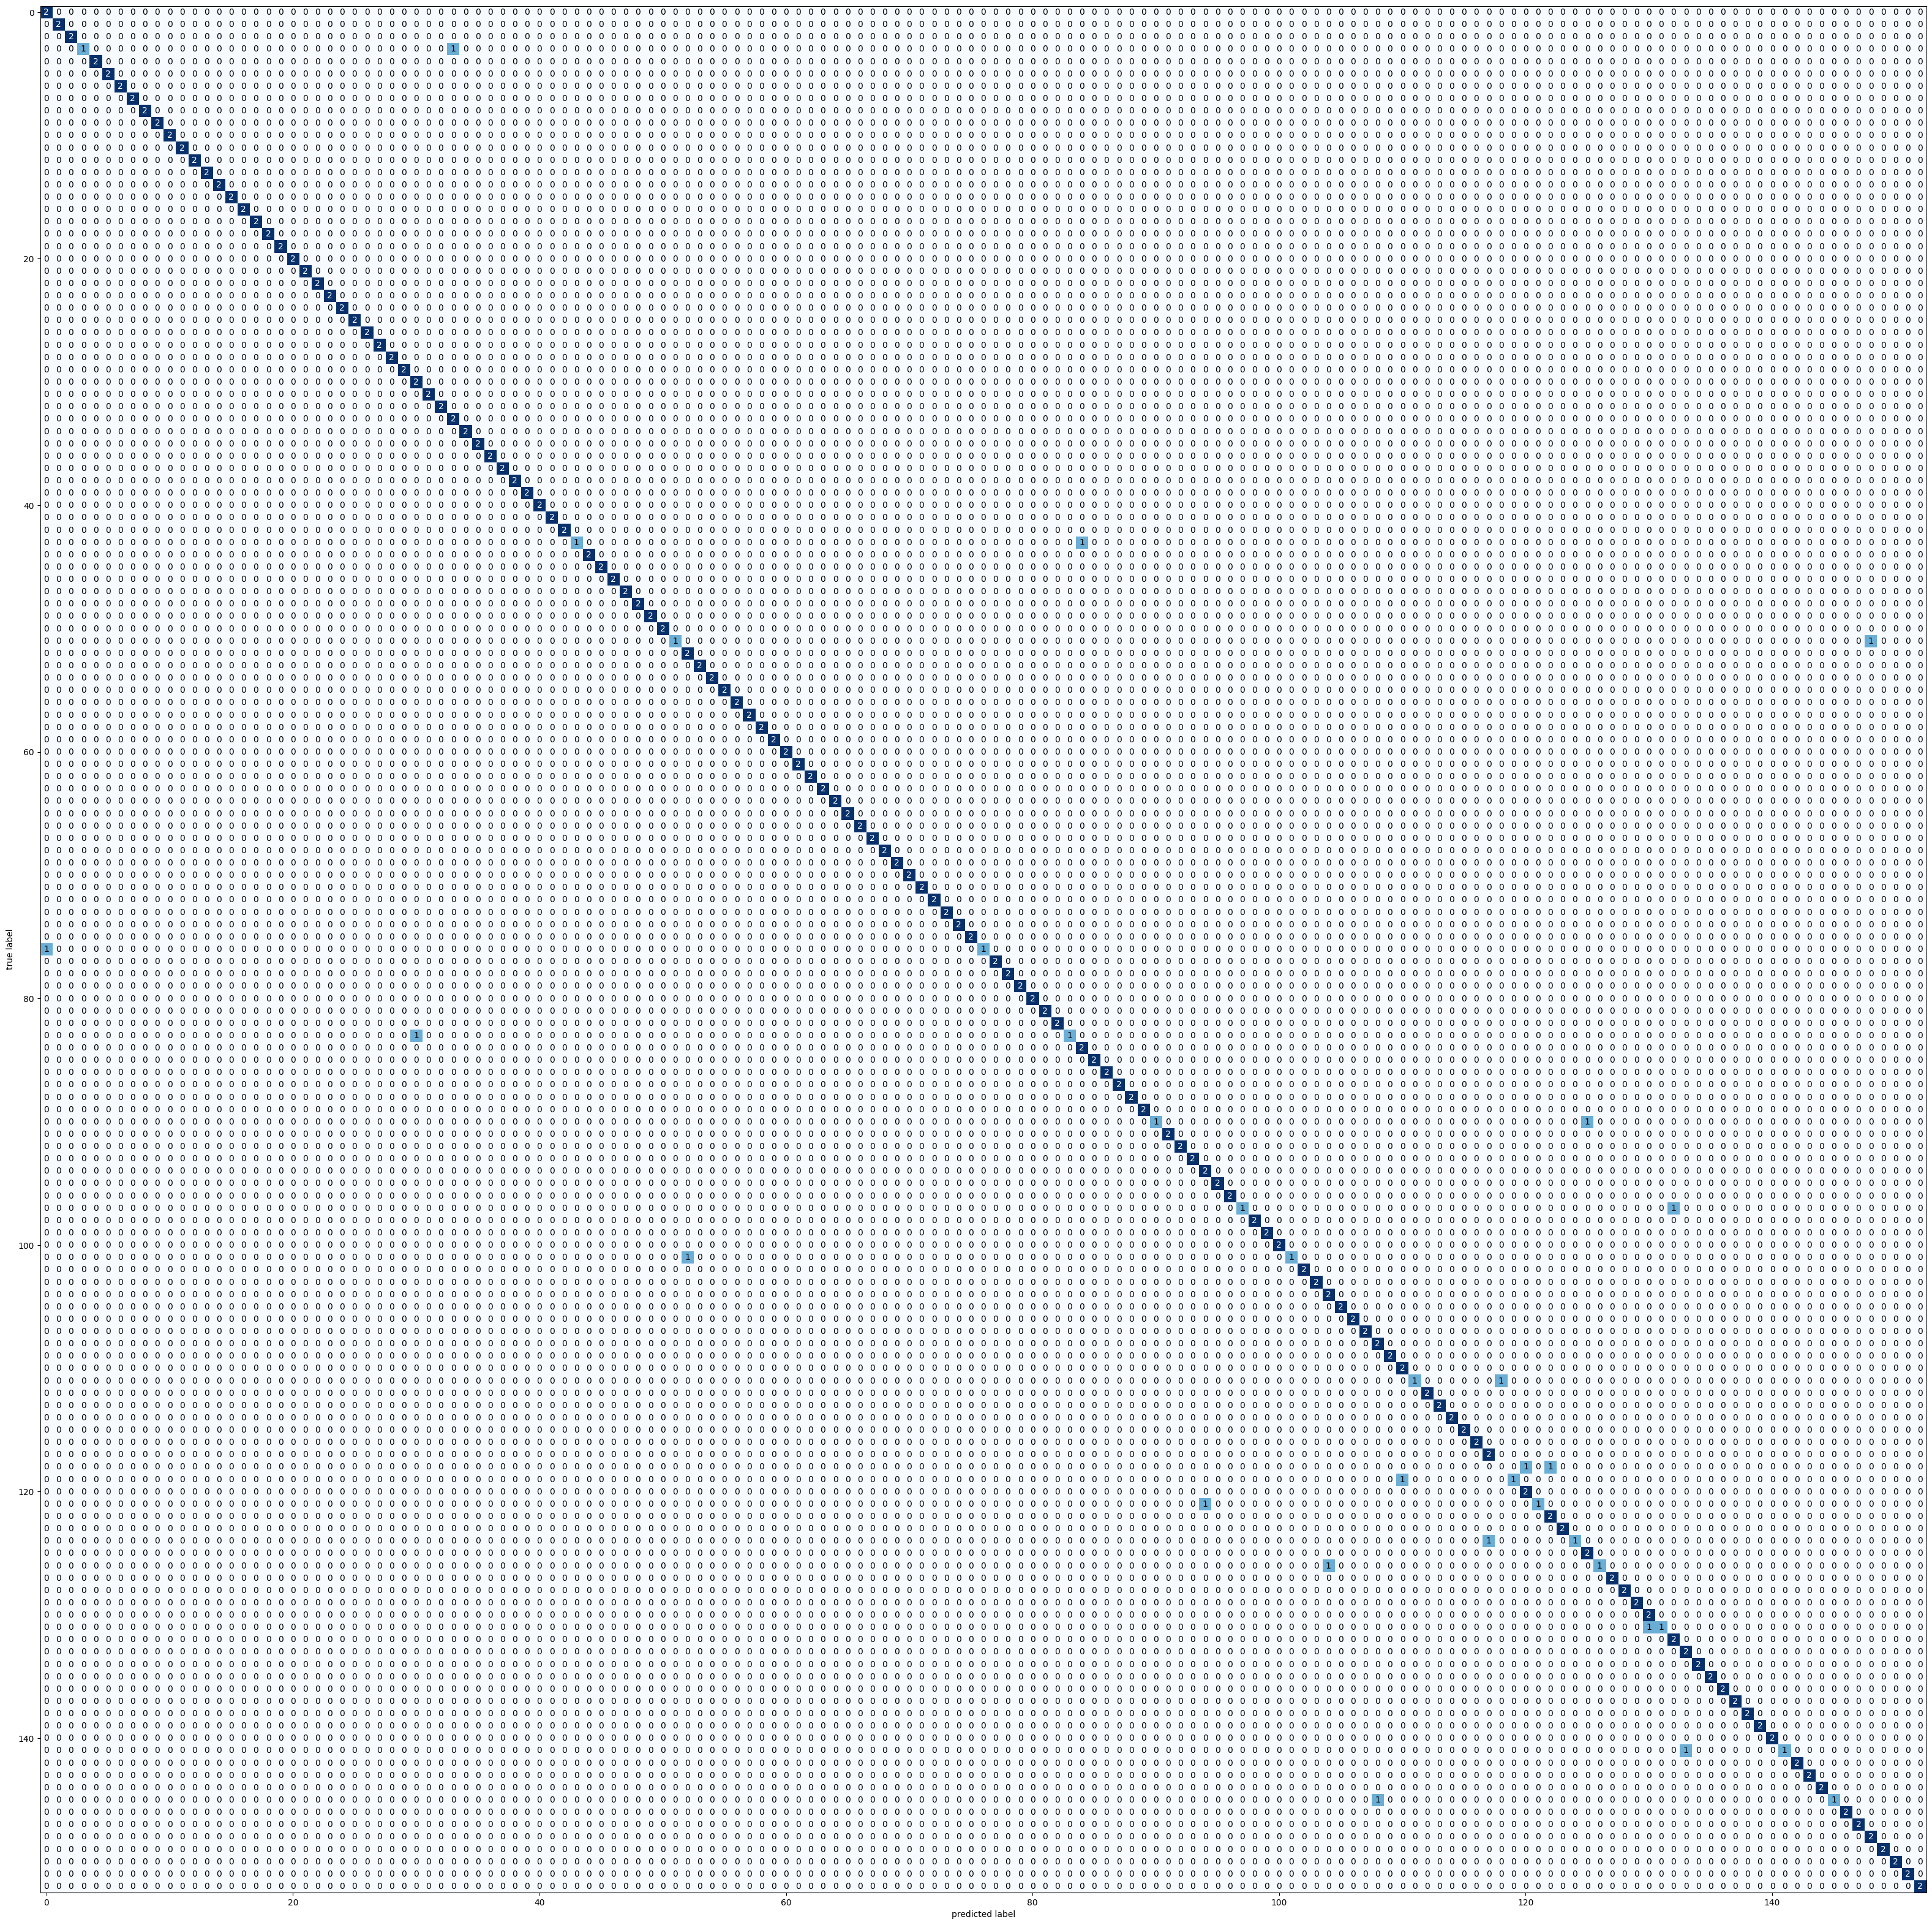

In [11]:
numpy.set_printoptions(threshold=sys.maxsize)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

images1 = "/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/TrainNormal+Fast"
files1= os.listdir(images1)
#print(files1)
X_train = [imread('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/TrainNormal+Fast/'+f) for f in files1]   # Getting Training Images
for f in files1:
    Y_train.append(f[7:10])
for i in range(0, len(Y_train)):
    Y_train[i] = int(Y_train[i])
#print(Y_train)
images2 = '/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/TestNormal+Fast'
files2= os.listdir(images2)
#print(files2)
X_test = [imread("/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/TestNormal+Fast/"+f) for f in files2]
for f in files2:
    Y_test.append(f[7:10])

for i in range(0, len(Y_test)):
    Y_test[i] = int(Y_test[i])
#print(Y_test)

X_train=np.array(X_train)
X_test=np.array(X_test)

img_rows=240
img_cols=240
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test=label_encoder.fit_transform(Y_test)
Y_train= label_encoder.fit_transform(Y_train)

print(Y_train)
print(Y_test)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
num_classes = 153
epochs = 65
MODEL_NAME = 'TrainedModelFile-{}-{}.model'.format("0.0001", 'TenLayers')
model = Sequential()
model.add(Conv2D(16,3, 3,input_shape=(240, 240, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 3, 3))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(124, 3, 3,padding='same'))
model.add(LeakyReLU(alpha=0.05))
model.add(ZeroPadding2D(padding=((0,1),(0,1))))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.05))
batch_size = 4

model.add(Dense(153, activation='softmax'))


print(model.summary())
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

import time
start_time=time.time()
history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs,validation_data=(X_test, Y_test))
#history=model.fit(X_train, Y_train,batch_size=4, epochs=epochs)
print('Training took {} seconds'.format(time.time()-start_time))
#model.save(MODEL_NAME)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/Curves.png')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test loss: ', test_loss)
print('Test Acc: ', test_acc)

from sklearn.metrics import accuracy_score

test_predictions = model.predict(X_test)


accuracy = accuracy_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1))*100
print("Accuracy: " + str(accuracy))
from sklearn.metrics import precision_score, recall_score
precision_score= precision_score(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1), average=None)

recall_score= recall_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1),average=None)
from sklearn.metrics import f1_score
F1=f1_score(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1), average=None)
from sklearn.metrics import confusion_matrix
results = confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(test_predictions,axis=1))
print(results)
from sklearn.metrics import classification_report
list3=[]
for i in range(1,154):
    list3.append("Person"+str(i))
#print(list3)
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(test_predictions,axis=1)))

list3=[]
for i in range(1,154):
    list3.append("Person"+str(i))
#print(list3)


labels=pd.DataFrame()
labels["ClassLabel"]=list3
labels["Precision"]=precision_score
labels["Recallvalue"]=recall_score
labels["F1Score"]=F1
labels.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/File.csv')

'''
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Results')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/AccuracyCurve.png')
plt.show()
plt.close()
'''
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss Results')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper right')
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/LossCurve.png')
plt.show()
plt.close()
'''
fig, ax = plot_confusion_matrix(conf_mat=results,colorbar=False,show_absolute=True,show_normed=False,figsize=(40,40))
plt.savefig('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/ConfusionMatrix.png')
plt.show()
plt.close()
arr = np.array(results)

df = pd.DataFrame(arr)

df.columns = list3
df["Rows/Col"]=list3
df.to_csv('/content/drive/MyDrive/DatasetGEIs/DatasetGEIs/SpeedExperiments/Normal+Fast/File2.csv')
